###### Proposal:-
In today's world, where data-driven decision-making is crucial, predicting a client's creditworthiness is essential for a bank to minimize risk and ensure the financial stability of its credit card department.Implementing an effective credit approval prediction model can significantly impact the banking sector by reducing the likelihood of defaults, thus improving overall financial stability and profitability.The proposed method can bridge the gap in knowledge by providing banks with a more accurate and data-driven approach to assess credit applications. This can be helpful for banks in India and globally to make better lending decisions, reducing non-performing assets and improving their loan portfolio's health.


##### Initial Hypothesis (or hypotheses):-
1.Hypothesis: Creditworthiness is likely to be correlated with annual income, employment status, and education level. These features may play a significant role in determining whether a credit card application is approved or rejected.

2.Hypothesis: There may be a relationship between gender and the ownership of cars and property, with gender potentially affecting creditworthiness.

3.Hypothesis: The number of children and family size may have an impact on credit approval, with larger families possibly being perceived as riskier.

###### Data Analysis Approach:-
In order to prove or disprove our hypotheses, the following data analysis approach will be used:

1.Exploratory Data Analysis (EDA): Explore and visualize the data to identify patterns and relationships between features and credit card approval.

2.Feature Engineering: Create new features, if necessary, based on the domain knowledge and initial hypothesis. This may involve transforming or combining existing features.

3.Statistical Testing: Use statistical tests to evaluate the significance of relationships identified during EDA.

4.Data Preprocessing: Handle missing data, encode categorical variables, and scale/normalize numerical features as needed.

5.Visualization: Create visualizations to explain the relationships and insights derived from the data.

###### Machine Learning Approach:-
For machine learning-based predictions of credit card approval, we will follow these steps:

1.Data Splitting: Split the data into training and testing sets to evaluate model performance.

2.Model Selection: Compare several machine learning models, such as Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting. Evaluate each model's performance based on appropriate metrics (e.g., accuracy, precision, recall, F1-score).

3.Model Tuning: Perform hyperparameter tuning to optimize the selected model(s).

4.Feature Importance: Assess the importance of features using techniques like feature importance scores from tree-based models.

5.Model Evaluation: Evaluate the model's performance using cross-validation to ensure generalizability.

6.Comparison of Models: Compare the performance of different models using relevant cost functions and visualization methods to justify the choice of the best-performing model.

## 0.Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Get the data

### 1.1 Load the dataset:-

In [2]:
credit_card_data = pd.read_csv('dataset/Credit_card.csv')
credit_status = pd.read_csv('dataset/Credit_card_label.csv')

### 1.2 Creating the Target Variable:-

In [3]:
# Merge the datasets on the common column "Ind_ID"
df = pd.merge(credit_card_data, credit_status, on="Ind_ID")

In [4]:
# Extract the "Label" column as the target variable
target_variable = df["label"]

In [5]:
target_variable.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
#Extract the columns present in dataframe as df
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

### 1.3 Rename Features:-

In [7]:
#rename the features to a more readable feature names
# Define a dictionary to map the current feature names to more readable names
credit_card_data = credit_card_data.rename(columns={
    "Ind_ID": "Client ID",
    "GENDER": "Gender",
    "Car_owner": "Has a car",
    "Propert_Owner": "Has a property",
    "CHILDREN": "Children count",
    "Annual_income": "Income",
    "Type_Income": "Employment status",
    "EDUCATION": "Education level",
    "Marital_status": "Marital status",
    "Housing_type": "Dwelling",
    "Birthday_count": "Age",
    "Employed_days": "Employment length",
    "Mobile_phone": "Has a mobile phone",
    "Work_phone": "Has a work phone",
    "Phone": "Has a phone",
    "EMAIL_ID": "Has an email",
    "Type_Occupation": "Job title",
    "Family_Members": "Family member count"
})

### 1.4 Split the data into training and test sets, creating a copy of the datasets:-

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# DataFrame called df
# Define the features and target variable
X = df.drop("label", axis=1)  # Features (all columns except the target variable)
y = df["label"]  # Target variable

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create copies of the training and test sets (to avoid modifying the original data)
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()


## 2.Explore the Data

### 2.1 Quick glance at the data

In [12]:
#shape of dataset 
credit_card_data.shape

(1548, 18)

In [13]:
#size of dataset
credit_card_data.size

27864

In [14]:
# Display the first few rows
credit_card_data.head()

Client ID Gender Car_Owner Has a property  Children count    Income  \
0    5008827      M         Y              Y               0  180000.0   
1    5009744      F         Y              N               0  315000.0   
2    5009746      F         Y              N               0  315000.0   
3    5009749      F         Y              N               0       NaN   
4    5009752      F         Y              N               0  315000.0   

      Employment status   Education level Marital status           Dwelling  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

       Age  Employment length  Has a mobile phone  Work_Phone  Has a phone  \
0 -18772.0             365243                   1           0            0   
1 -13557.0               -586                   1           1            1   
2      NaN               -586                   1           1            1   
3 -13557.0               -586                   1           1            1   
4 -13557.0               -586                   1           1            1   

   Has an email Job title  Family member count  
0             0       NaN                    2  
1             0       NaN                    2  
2             0       NaN                    2  
3             0       NaN                    2  
4             0       NaN                    2

In [15]:
# Display the last few rows
credit_card_data.tail()

Client ID Gender Car_Owner Has a property  Children count    Income  \
1543    5028645      F         N              Y               0       NaN   
1544    5023655      F         N              N               0  225000.0   
1545    5115992      M         Y              Y               2  180000.0   
1546    5118219      M         Y              N               0  270000.0   
1547    5053790      F         Y              Y               0  225000.0   

         Employment status                Education level  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital status           Dwelling      Age  Employment length  \
1543               Married  House / apartment -11957.0              -2182   
1544  Single / not married  House / apartment -10229.0              -1209   
1545               Married  House / apartment -13174.0              -2477   
1546        Civil marriage  House / apartment -15292.0               -645   
1547               Married  House / apartment -16601.0              -2859   

      Has a mobile phone  Work_Phone  Has a phone  Has an email    Job title  \
1543                   1           0            0             0     Managers   
1544                   1           0            0             0  Accountants   
1545                   1           0            0             0     Managers   
1546                   1           1            1             0      Drivers   
1547                   1           0            0             0          NaN   

      Family member count  
1543                    2  
1544                    1  
1545                    4  
1546                    2  
1547                    2

In [16]:
# Generate the summary statistics
credit_card_data.describe(include='all')

Client ID Gender Car_Owner Has a property  Children count  \
count   1.548000e+03   1541      1548           1548     1548.000000   
unique           NaN      2         2              2             NaN   
top              NaN      F         N              Y             NaN   
freq             NaN    973       924           1010             NaN   
mean    5.078920e+06    NaN       NaN            NaN        0.412791   
std     4.171759e+04    NaN       NaN            NaN        0.776691   
min     5.008827e+06    NaN       NaN            NaN        0.000000   
25%     5.045070e+06    NaN       NaN            NaN        0.000000   
50%     5.078842e+06    NaN       NaN            NaN        0.000000   
75%     5.115673e+06    NaN       NaN            NaN        1.000000   
max     5.150412e+06    NaN       NaN            NaN       14.000000   

              Income Employment status                Education level  \
count   1.525000e+03              1548                           1548   
unique           NaN                 4                              5   
top              NaN           Working  Secondary / secondary special   
freq             NaN               798                           1031   
mean    1.913993e+05               NaN                            NaN   
std     1.132530e+05               NaN                            NaN   
min     3.375000e+04               NaN                            NaN   
25%     1.215000e+05               NaN                            NaN   
50%     1.665000e+05               NaN                            NaN   
75%     2.250000e+05               NaN                            NaN   
max     1.575000e+06               NaN                            NaN   

       Marital status           Dwelling           Age  Employment length  \
count            1548               1548   1526.000000        1548.000000   
unique              5                  6           NaN                NaN   
top           Married  House / apartment           NaN                NaN   
freq             1049               1380           NaN                NaN   
mean              NaN                NaN -16040.342071       59364.689922   
std               NaN                NaN   4229.503202      137808.062701   
min               NaN                NaN -24946.000000      -14887.000000   
25%               NaN                NaN -19553.000000       -3174.500000   
50%               NaN                NaN -15661.500000       -1565.000000   
75%               NaN                NaN -12417.000000        -431.750000   
max               NaN                NaN  -7705.000000      365243.000000   

        Has a mobile phone   Work_Phone  Has a phone  Has an email Job title  \
count               1548.0  1548.000000  1548.000000   1548.000000      1060   
unique                 NaN          NaN          NaN           NaN        18   
top                    NaN          NaN          NaN           NaN  Laborers   
freq                   NaN          NaN          NaN           NaN       268   
mean                   1.0     0.208010     0.309432      0.092377       NaN   
std                    0.0     0.406015     0.462409      0.289651       NaN   
min                    1.0     0.000000     0.000000      0.000000       NaN   
25%                    1.0     0.000000     0.000000      0.000000       NaN   
50%                    1.0     0.000000     0.000000      0.000000       NaN   
75%                    1.0     0.000000     1.000000      0.000000       NaN   
max                    1.0     1.000000     1.000000      1.000000       NaN   

        Family member count  
count           1548.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean               2.161499  
std                0.947772  
min                1.000000  
25%                2.000000  
50%                2.000000  
75%                3.000000  
max               15.000000

In [17]:
# Get the data types of each column
credit_card_data.dtypes

Client ID                int64
Gender                  object
Car_Owner               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Age                    float64
Employment length        int64
Has a mobile phone       int64
Work_Phone               int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count      int64
dtype: object

In [18]:
#summary of a DataFrame
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Client ID            1548 non-null   int64  
 1   Gender               1541 non-null   object 
 2   Car_Owner            1548 non-null   object 
 3   Has a property       1548 non-null   object 
 4   Children count       1548 non-null   int64  
 5   Income               1525 non-null   float64
 6   Employment status    1548 non-null   object 
 7   Education level      1548 non-null   object 
 8   Marital status       1548 non-null   object 
 9   Dwelling             1548 non-null   object 
 10  Age                  1526 non-null   float64
 11  Employment length    1548 non-null   int64  
 12  Has a mobile phone   1548 non-null   int64  
 13  Work_Phone           1548 non-null   int64  
 14  Has a phone          1548 non-null   int64  
 15  Has an email         1548 non-null   i

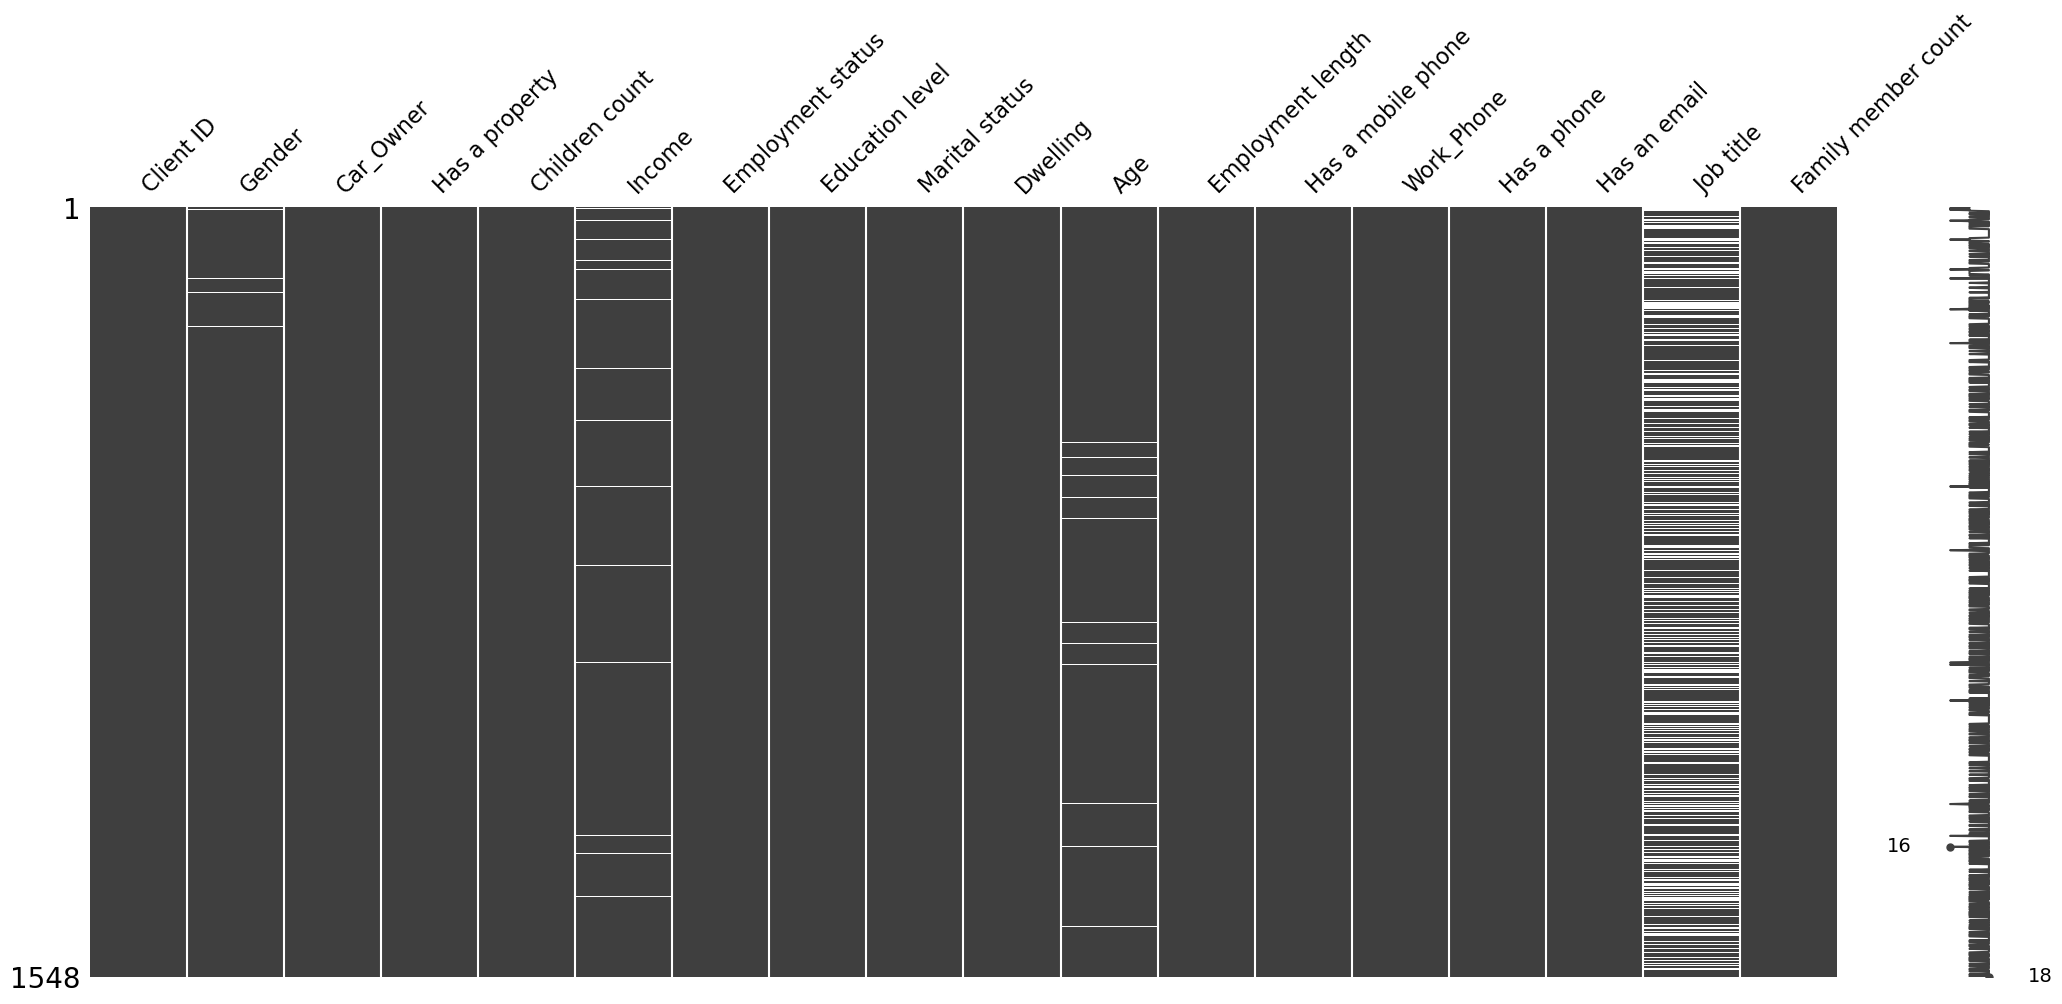

In [19]:
#Visualize Missing Data:
import missingno as msno
msno.matrix(credit_card_data)
plt.show()

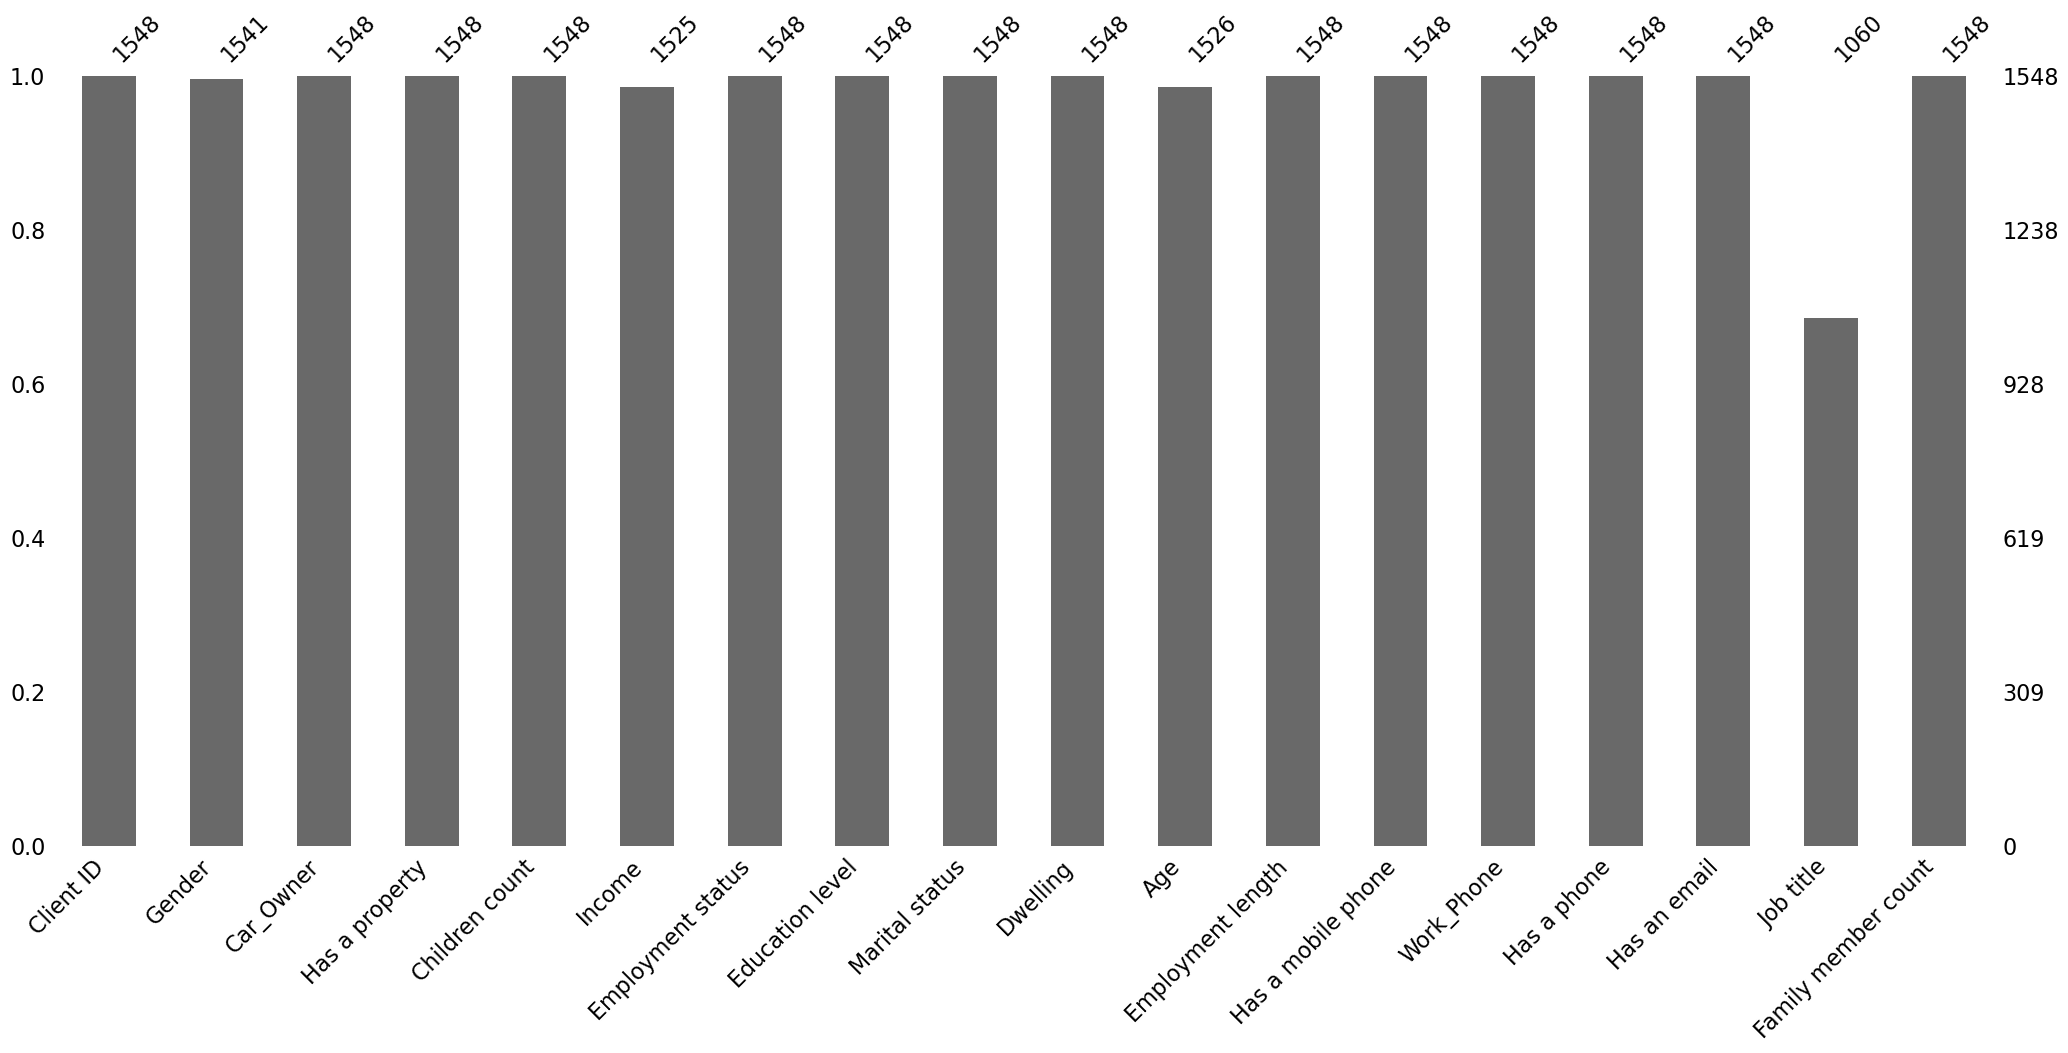

In [20]:
#Visualize Missing Data:
msno.bar(credit_card_data)
plt.show()

### 2.2 Functions used to explore each feature

In [21]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

### 2.3 Univariate analysis

### 2.3.1. Gender

In [22]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print(f"Feature Name: {feature_name}")
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Gender')


Feature Name: Gender
Description:
count     1541
unique       2
top          F
freq       973
Name: Gender, dtype: object
**************************************************
Data Type: object
**************************************************
Value count:
        Count  Frequency (%)
Gender                      
F         973      62.855297
M         568      36.692506


In [23]:
import plotly.express as px

# 'credit_card_data' as actual DataFrame and 'Gender' with your feature name
fig = px.bar(credit_card_data, x='Gender', title="Bar Graph of Gender Distribution")

# Update the layout to position the title in the middle at the top
fig.update_layout(
    title=dict(text="Bar Graph of Gender Distribution", x=0.5, y=0.9)
)

# Show the plot
fig.show()


In [24]:
# 'credit_card_data' as actual DataFrame and 'Gender' with your feature name
gender_counts = credit_card_data['Gender'].value_counts().reset_index()

# Rename the columns for the pie plot
gender_counts.columns = ['Gender', 'Count']

# Create a pie plot
fig = px.pie(gender_counts, names='Gender', values='Count', title="Pie Chart of Gender Distribution")

# Update the layout to position the title in the middle at the top
fig.update_layout(
    title=dict(text="Pie Chart of Gender Distribution", x=0.5, y=0.9)
)

# Show the plot
fig.show()

##### Interpretation:
- We have more female applicants than male (63% vs 36%)

In [25]:
credit_card_data.columns

Index(['Client ID', 'Gender', 'Car_Owner', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Work_Phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count'],
      dtype='object')

### 2.3.2 Age

In [26]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        # Convert the feature to positive numbers of days
        positive_days_feature = np.abs(feature) / 365.25
        print(f"Feature Name: {feature_name}")
        print("Description (Positive Days):")
        print(positive_days_feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
gen_info_feat(credit_card_data, 'Age')

Feature Name: Age
Description (Positive Days):
count    1526.000000
mean       43.916063
std        11.579749
min        21.095140
25%        33.995893
50%        42.878850
75%        53.533196
max        68.298426
Name: Age, dtype: float64
**************************************************
Data Type: float64


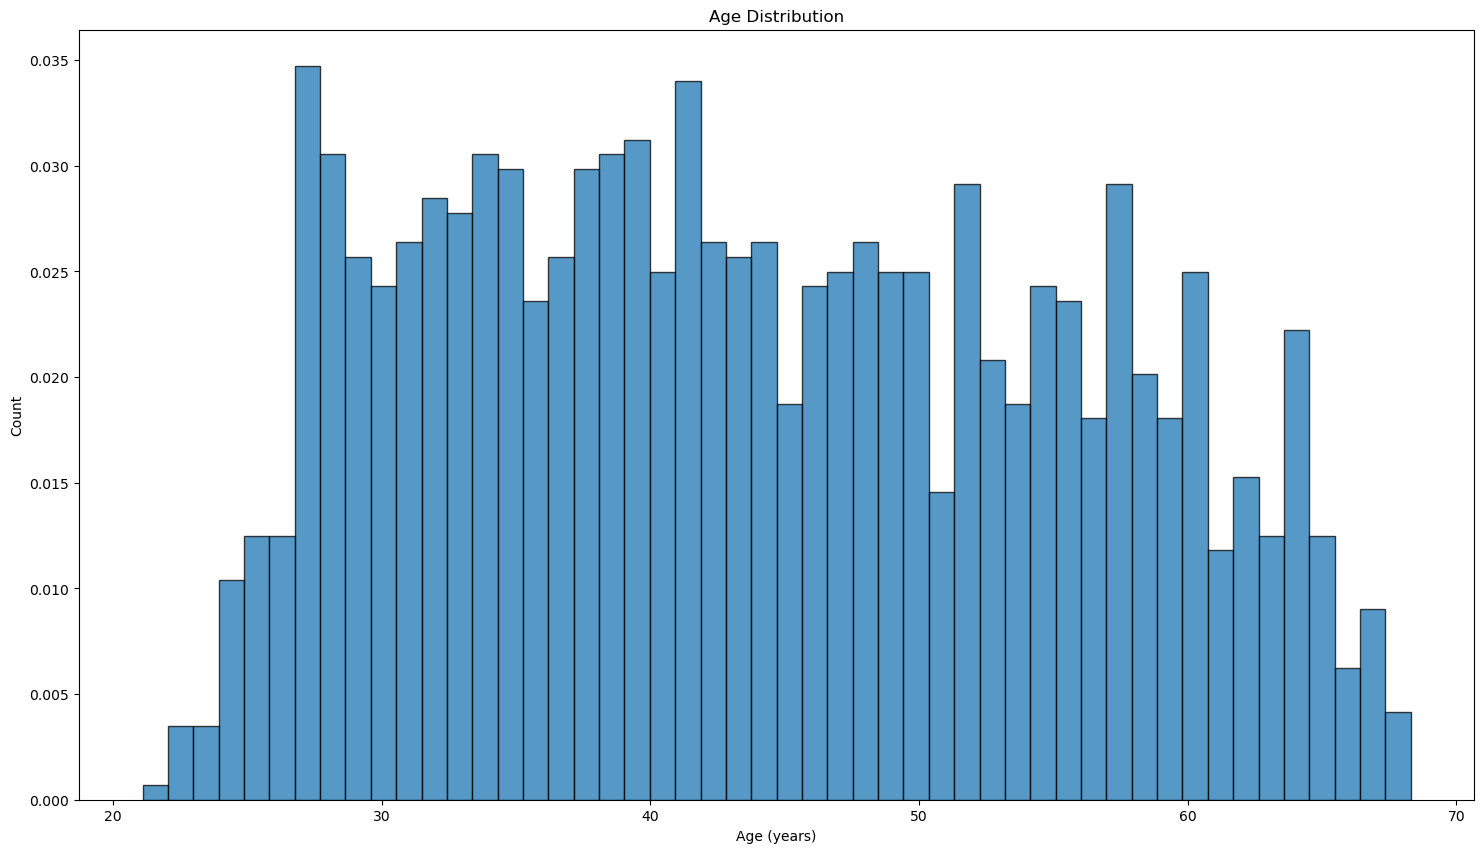

In [27]:
def create_hist_plot(df, feature, the_bins=50):
    fig, ax = plt.subplots(figsize=(18, 10))
    # Change the feature to be expressed in positive numbers (in years)
    age_years = df[feature].abs() / 365.25  # Assuming 365.25 days in a year
    plt.hist(age_years, bins=the_bins, edgecolor='k', density=True, alpha=0.75)
    plt.title('Age Distribution')
    plt.xlabel('Age (years)')
    plt.ylabel('Count')
    plt.show()

# Call the function with the dataset and feature
create_hist_plot(credit_card_data, 'Age')


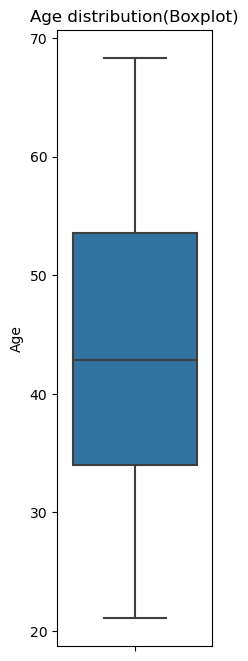

In [28]:
# function to create a box plot
def create_box_plot(df,feature):
    fig, ax = plt.subplots(figsize=(2,8))
    # change the feature to be express in positive numbers days        
    sns.boxplot(y=np.abs(df[feature])/365.25)
    plt.title('{} distribution(Boxplot)'.format(feature))
    return plt.show()

# Call the function with the dataset and feature
create_box_plot(credit_card_data, 'Age')


#### Bivariate analysis with target variable

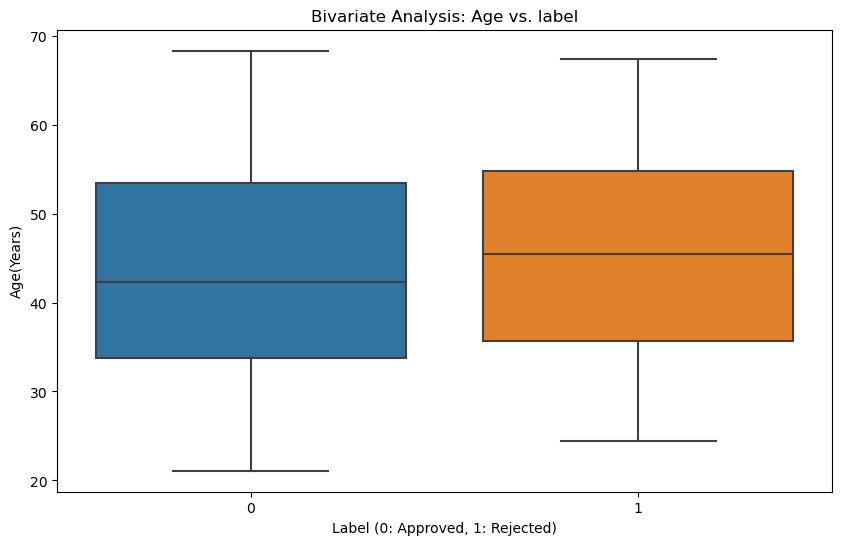

In [29]:
# Assuming you have a DataFrame 'df' containing 'Birthday_count' and 'Label'
# Convert "Birthday_count" to years (assuming 365.25 days in a year)
df['Birthday_count_years'] = df['Birthday_count'].abs() / 365.25

# Bivariate analysis using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="Birthday_count_years", data=df)
plt.title("Bivariate Analysis: Age vs. label")
plt.xlabel("Label (0: Approved, 1: Rejected)")
plt.ylabel("Age(Years)")
plt.show()

###### Interpretation:
- The youngest applicant is 21 years old while the oldest is 68 years old. with the average of 43.7 and median of 42.6(outliers insensitive)
- Age feature is not normally distributed, it is slightly positively skew


### 2.3.3 Marital status

In [30]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print(f"Feature Name: {feature_name}")
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Marital status')

Feature Name: Marital status
Description:
count        1548
unique          5
top       Married
freq         1049
Name: Marital status, dtype: object
**************************************************
Data Type: object
**************************************************
Value count:
                      Count  Frequency (%)
Marital status                            
Married                1049      67.764858
Single / not married    227      14.664083
Civil marriage          101       6.524548
Separated                96       6.201550
Widow                    75       4.844961


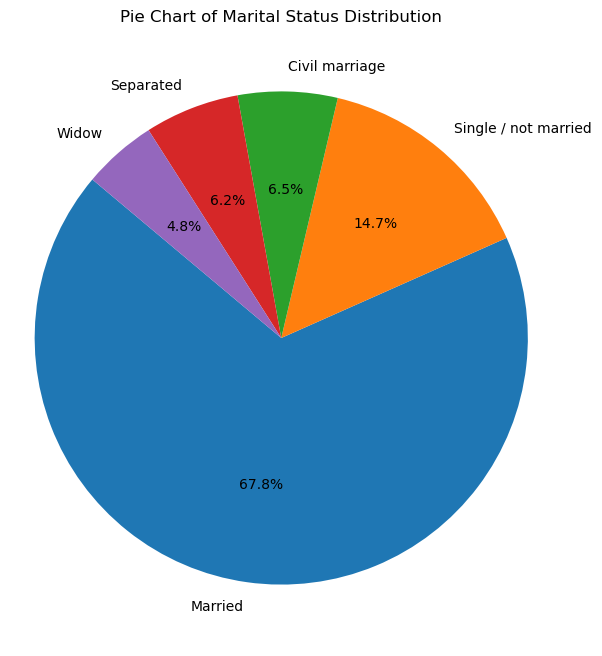

In [31]:
# Extract the data for the "Marital status" feature
marital_status_counts = credit_card_data['Marital status'].value_counts()

# Create a pie plot
plt.figure(figsize=(7,8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Marital Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Show the plot
plt.show()

In [32]:
import plotly.express as px

# 'credit_card_data' as DataFrame
fig = px.bar(credit_card_data, x='Marital status', title="Bar Chart of Marital Status Distribution")

# Customize the appearance and layout of the chart
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1, opacity=0.7)

# Set tighter margins to make the bars hug the x-axis
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
fig.show()


<Figure size 1000x600 with 0 Axes>

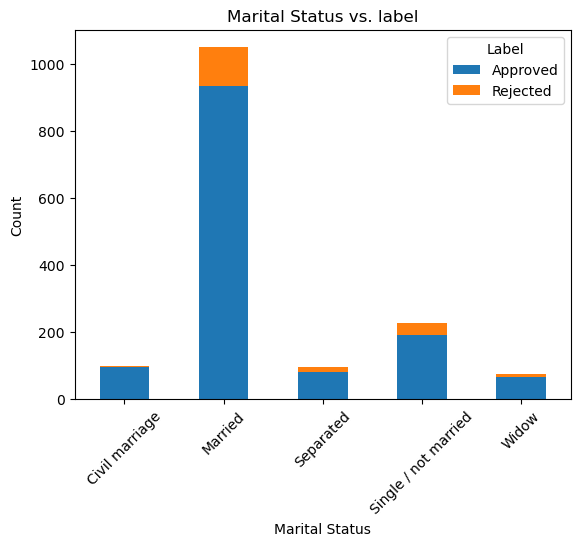

In [33]:
# Assuming you have a DataFrame 'df' containing 'Marital_Status' and 'Label'
# Group the data by 'Marital_Status' and 'Label', and count the occurrences
grouped_data = df.groupby(['Marital_status', 'label']).size().unstack()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title("Marital Status vs. label")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Approved', 'Rejected'])
plt.show() 

###### Interpretation:
- Most applicants are married
- Even though we have a higher number of applicants who are single/not married than those who are widow,civil married and separated

### 2.3.4 Family member count

In [34]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Family member count')


Description:
count    1548.000000
mean        2.161499
std         0.947772
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family member count, dtype: float64
**************************************************
Data Type: int64
**************************************************
Value count:
                     Count  Frequency (%)
Family member count                      
2                      802      51.808786
1                      334      21.576227
3                      268      17.312661
4                      127       8.204134
5                       15       0.968992
6                        1       0.064599
15                       1       0.064599


In [35]:
# credit_card_data with your actual DataFrame
fig = px.box(credit_card_data, y='Family member count', title="Family Member Count Distribution(BoxPlot)")

# Show the plot
fig.show()

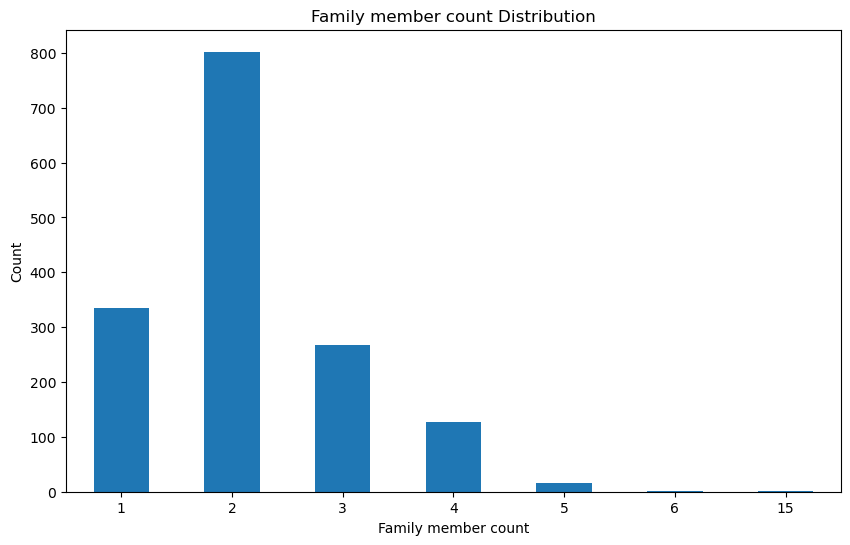

In [36]:
# Calculate the value counts of different family sizes
family_size_counts = credit_card_data['Family member count'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
family_size_counts.plot(kind='bar')
plt.title("Family member count Distribution")
plt.xlabel("Family member count")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

##### Interpretation:
-   Most applicants are two in their family size
-   We also have 3 outliers, 2 of them are extreme with 6 and 114 members in their Family Size


### 2.3.5 Children count 

In [37]:
credit_card_data.columns

Index(['Client ID', 'Gender', 'Car_Owner', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Work_Phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count'],
      dtype='object')

In [38]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Children count')

Description:
count    1548.000000
mean        0.412791
std         0.776691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: Children count, dtype: float64
**************************************************
Data Type: int64
**************************************************
Value count:
                Count  Frequency (%)
Children count                      
0                1091      70.478036
1                 305      19.702842
2                 134       8.656331
3                  16       1.033592
4                   1       0.064599
14                  1       0.064599


In [39]:
# credit_card_data with your actual DataFrame
fig = px.box(credit_card_data, y='Children count', title="Children count Count Distribution(BoxPlot)")

# Show the plot
fig.show()

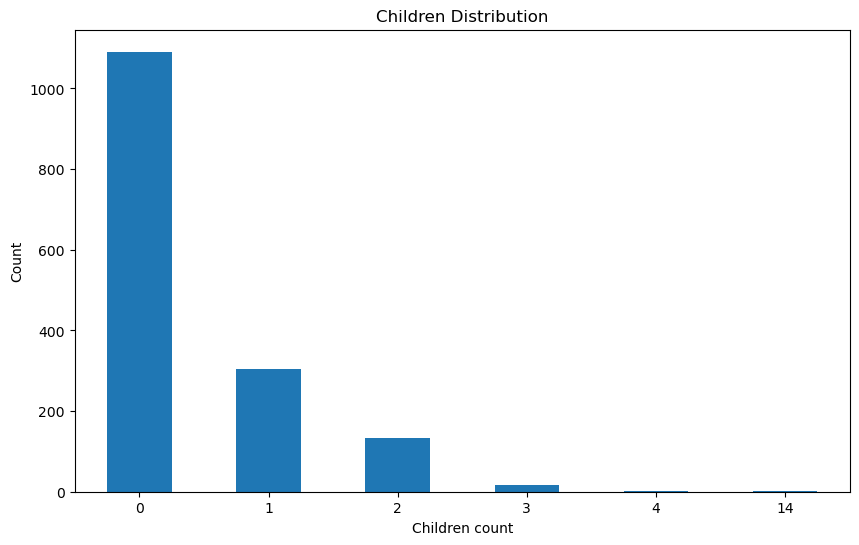

In [40]:
# Calculate the value counts of different numbers of children
children_counts = credit_card_data['Children count'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
children_counts.plot(kind='bar')
plt.title("Children Distribution")
plt.xlabel("Children count")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

##### Interpretation:

- As previously discussed most applicant don’t have a child
- Also here we have 3 outliers, probably the same from the family size

### 2.3.6 Dwelling(House) type

In [41]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Dwelling')

Description:
count                  1548
unique                    6
top       House / apartment
freq                   1380
Name: Dwelling, dtype: object
**************************************************
Data Type: object
**************************************************
Value count:
                     Count  Frequency (%)
Dwelling                                 
House / apartment     1380      89.147287
With parents            80       5.167959
Municipal apartment     53       3.423773
Rented apartment        21       1.356589
Office apartment         9       0.581395
Co-op apartment          5       0.322997


In [42]:
import plotly.express as px

# Assuming you have a DataFrame 'df' containing the 'Housing_Type' feature

# Calculate the value counts of different housing types
housing_type_counts = credit_card_data['Dwelling'].value_counts()

# Create a DataFrame from the counts
housing_type_df = pd.DataFrame({'Housing_Type': housing_type_counts.index, 'Count': housing_type_counts.values})

# Create a pie chart using Plotly
fig = px.pie(housing_type_df, names='Housing_Type', values='Count', title='Housing Type Distribution')
fig.show()

In [43]:
# Calculate the value counts of different housing types
housing_type_counts = credit_card_data['Dwelling'].value_counts()

# Create a DataFrame from the counts
housing_type_df = pd.DataFrame({'Housing_Type': housing_type_counts.index, 'Count': housing_type_counts.values})

# Create a bar plot using Plotly Express
fig = px.bar(housing_type_df, x='Housing_Type', y='Count', title='Housing Type Distribution')
fig.show()

##### Interpretation:
- Almost every applicants live in house or apartment

### 2.3.7 Income

In [44]:
# Set the display format for float values
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Define the gen_info_feat function
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Income')

Description:
count      1525.00
mean     191399.33
std      113253.00
min       33750.00
25%      121500.00
50%      166500.00
75%      225000.00
max     1575000.00
Name: Income, dtype: float64
**************************************************
Data Type: float64
**************************************************
Value count:
           Count  Frequency (%)
Income                         
135000.00    170          10.98
112500.00    144           9.30
180000.00    137           8.85
157500.00    125           8.07
225000.00    119           7.69
...          ...            ...
119700.00      1           0.06
69372.00       1           0.06
37800.00       1           0.06
333000.00      1           0.06
69750.00       1           0.06

[115 rows x 2 columns]


In [45]:
# Replace 'credit_card_data' with your actual DataFrame and 'Income' with your feature name
fig = px.box(credit_card_data, y='Income', title="Box Plot of Income")

# Show the plot
fig.show()

In [46]:
import plotly.express as px

# Replace 'credit_card_data' with your actual DataFrame and 'Income' with your feature name
fig = px.histogram(credit_card_data, x='Income', title="Histogram of Income")

# Show the plot
fig.show()


#### Bivariate analysis with target variable

In [47]:
# Assuming you have a DataFrame 'df' with 'Label' (0 for Approved, 1 for Rejected) and 'Annual_income' features
# Create a box plot using Plotly Express with labeled categories
fig = px.box(df, y='label', x='Type_Income', title='Bivariate Analysis:Income vs. Label (Box Plot)',
             category_orders={'label': ['0: Approved', '1: Rejected']})
fig.update_xaxes(title_text='label')
fig.update_yaxes(title_text='Income')
fig.show()

##### Interpretation:
-The average income is 191399 but this amount accounts for outliers. If we ignore the outlier most people make 157500

-We have 4 applicants who makes more than 1000000

-This feature is positively skewed

### 2.3.8 Job title

In [48]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Job title')

Description:
count         1060
unique          18
top       Laborers
freq           268
Name: Job title, dtype: object
**************************************************
Data Type: object
**************************************************
Value count:
                       Count  Frequency (%)
Job title                                  
Laborers                 268          17.31
Core staff               174          11.24
Managers                 136           8.79
Sales staff              122           7.88
Drivers                   86           5.56
High skill tech staff     65           4.20
Medicine staff            50           3.23
Accountants               44           2.84
Security staff            25           1.61
Cleaning staff            22           1.42
Cooking staff             21           1.36
Private service staff     17           1.10
Secretaries                9           0.58
Low-skill Laborers         9           0.58
Waiters/barmen staff       5           0.32

In [49]:
job_title_nan_count = credit_card_data['Job title'].isna().sum()
job_title_nan_count

488

In [50]:
rows_total_count = credit_card_data.shape[0]
rows_total_count

1548

In [51]:
print('The percentage of missing rows is {:.2f} %'.format(job_title_nan_count * 100 / rows_total_count))

The percentage of missing rows is 31.52 %


In [52]:
# Calculate the value counts of different occupations
occupation_counts = credit_card_data['Job title'].value_counts()

# Create a DataFrame from the counts
occupation_count_df = pd.DataFrame({'Occupation': occupation_counts.index, 'Count': occupation_counts.values})

# Create a bar plot using Plotly Express
fig = px.bar(occupation_count_df, x='Occupation', y='Count', title='Job  Distribution')
fig.update_xaxes(title_text='Job Title')
fig.update_yaxes(title_text='Count')
fig.show()

##### Interpretation:

-The most prolific Job title is laborers by far

-We have 31.52% if missing data

### 2.3.9 Employment status

In [53]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data,'Employment status')

Description:
count        1548
unique          4
top       Working
freq          798
Name: Employment status, dtype: object
**************************************************
Data Type: object
**************************************************
Value count:
                      Count  Frequency (%)
Employment status                         
Working                 798          51.55
Commercial associate    365          23.58
Pensioner               269          17.38
State servant           116           7.49


In [54]:
# Calculate the value counts of different employment statuses
employment_counts = credit_card_data['Employment status'].value_counts().reset_index()
employment_counts.columns = ['Employment status', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(employment_counts, x='Employment status', y='Count', title='Employment Status Distribution')
fig.show()

In [55]:
# Calculate the value counts of different employment statuses
employment_counts = credit_card_data['Employment status'].value_counts().reset_index()
employment_counts.columns = ['Employment status', 'Count']

# Create a pie plot using Plotly Express
fig = px.pie(employment_counts, names='Employment status', values='Count', title='Employment Status Distribution')
fig.show()

###### Interpretation:
- Most applicants are employed

# 2.3.10 Education level

In [56]:
def gen_info_feat(data, feature_name):

    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Data Type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Education level')

Description:
count                              1548
unique                                5
top       Secondary / secondary special
freq                               1031
Name: Education level, dtype: object
**************************************************
Data Type: object
**************************************************
Value count:
                               Count  Frequency (%)
Education level                                    
Secondary / secondary special   1031          66.60
Higher education                 426          27.52
Incomplete higher                 68           4.39
Lower secondary                   21           1.36
Academic degree                    2           0.13


In [57]:
# Assuming you have a DataFrame 'df' containing the 'Education_Level' feature
# Calculate the value counts of different education levels
education_counts = credit_card_data['Education level'].value_counts()

# Create a DataFrame from the counts
education_count_df = pd.DataFrame({'Education level': education_counts.index, 'Count': education_counts.values})

# Create a pie plot using Plotly Express
fig = px.pie(education_count_df, names='Education level', values='Count', title='Education Level Distribution')
fig.show()


In [58]:
# Calculate the value counts of different education levels
education_counts = credit_card_data['Education level'].value_counts()

# Create a DataFrame from the counts
education_count_df = pd.DataFrame({'Education level': education_counts.index, 'Count': education_counts.values})

# Create a bar graph using Plotly Express
fig = px.bar(education_count_df, x='Education level', y='Count', title='Education Level Distribution (Bar Graph)')
fig.update_xaxes(title_text='Education Level')
fig.update_yaxes(title_text='Count')
fig.show()


##### Interpretation:

-	The majority of applicants have completed their secondary degree, one Third completed their higher education

### 2.3.11 Employment length

In [59]:
def gen_info_feat(data, feature_name):
    # select only the rows where the rows are negative to ignore whose who have retired or unemployed
    employment_len_no_ret = credit_card_data['Employment length'][credit_card_data['Employment length'] < 0]
    employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
    print('Description:\n{}'.format((employment_len_no_ret_yrs).describe()))
    print('*'*50)
    print('Object type:{}'.format(employment_len_no_ret.dtype))
gen_info_feat(credit_card_data, 'Employment length')

Description:
count   1287.00
mean       7.30
std        6.56
min        0.20
25%        2.55
50%        5.35
75%        9.60
max       40.76
Name: Employment length, dtype: float64
**************************************************
Object type:int64


In [60]:
# Create a box plot using Plotly Express
fig = px.box(credit_card_data, y='Employment length', title='Box Plot of Employment Length')
fig.update_yaxes(title_text='Employment Length')
fig.show()


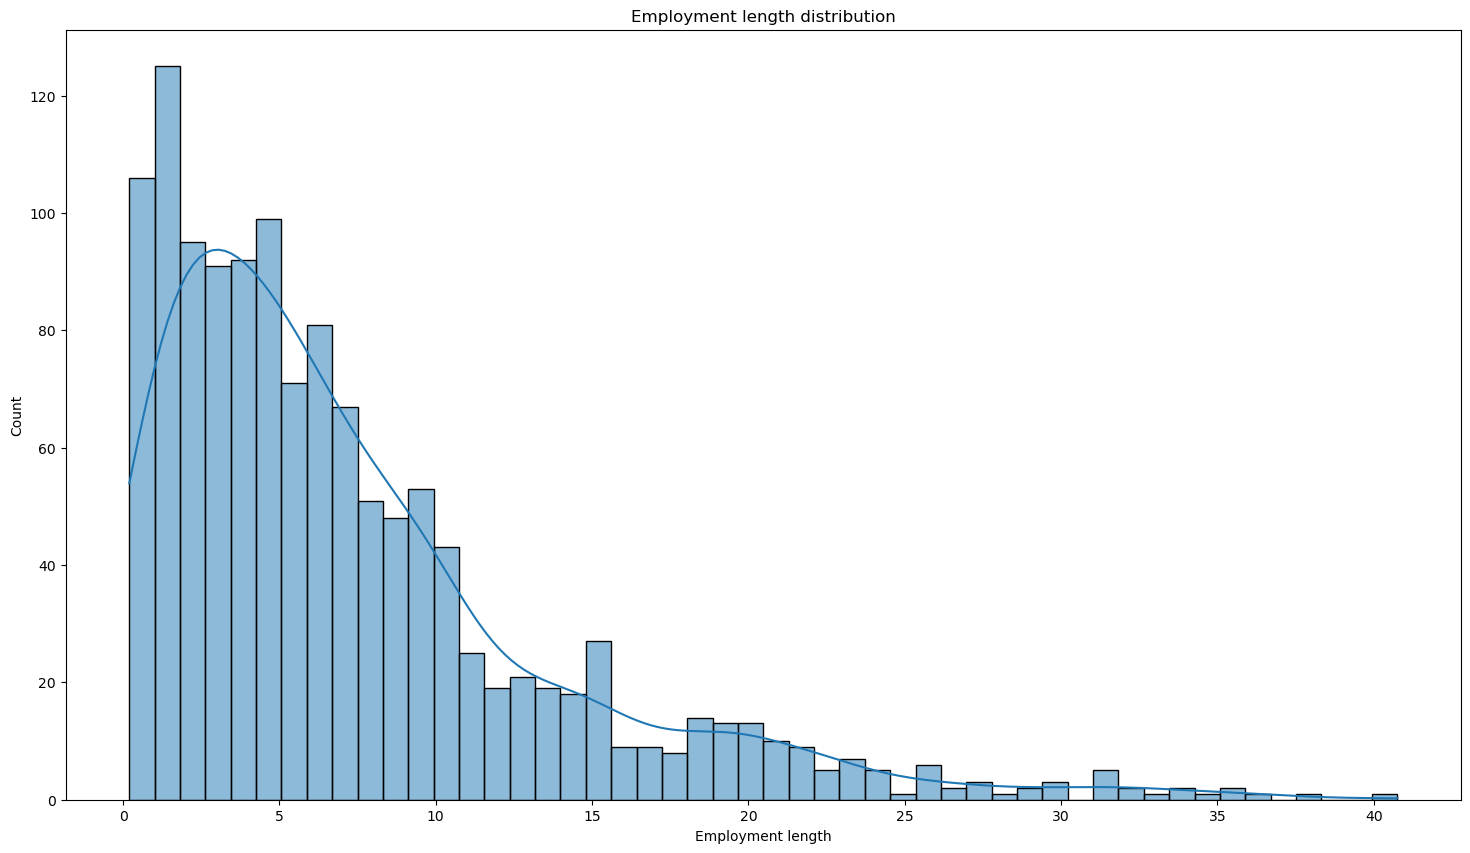

In [61]:
def create_hist_plot(df,feature, the_bins=50):
    employment_len_no_ret = credit_card_data['Employment length'][credit_card_data['Employment length'] < 0]
    employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
    fig, ax = plt.subplots(figsize=(18,10))
    sns.histplot(employment_len_no_ret_yrs,bins=the_bins,kde=True)
    plt.title('{} distribution'.format(feature))
    return plt.show()
create_hist_plot(credit_card_data,'Employment length')

###### Bivariate analysis with target variable

In [62]:
# Assuming you have a DataFrame 'df' containing 'Employed_days' and 'label'
# Filter the data for positive Employed_days (since box plots are not suitable for categorical data)
filtered_data = df[df['Employed_days'] >= 0]

# Create a box plot using Plotly Express
fig = px.box(filtered_data, x='label', y='Employed_days', title="Box Plot of Employed Days vs. Label")

# Show the plot
fig.show()

##### Interpretation:
-Most of applicant have been working for 5 to 7 years on average

-We have quite a number of outliers who have been working for more than 20 years+

-The employment length is positively skewed

### 2.3.12 Has a car

In [63]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Object type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Car_Owner')

Description:
count     1548
unique       2
top          N
freq       924
Name: Car_Owner, dtype: object
**************************************************
Object type: object
**************************************************
Value count:
           Count  Frequency (%)
Car_Owner                      
N            924          59.69
Y            624          40.31


In [64]:
# Calculate the value counts of car ownership
car_owner_counts = credit_card_data['Car_Owner'].value_counts()

# Create a DataFrame from the counts
car_owner_count_df = pd.DataFrame({'Car_Owner': car_owner_counts.index, 'Count': car_owner_counts.values})

# Create a bar graph using Plotly Express
fig = px.bar(car_owner_count_df, x='Car_Owner', y='Count', title='Car Ownership Distribution')
fig.update_xaxes(title_text='Car Owner')
fig.update_yaxes(title_text='Count')
fig.show()

In [65]:
# Calculate the value counts of different car ownership statuses
car_owner_counts = credit_card_data['Car_Owner'].value_counts()

# Create a DataFrame from the counts
car_owner_count_df = pd.DataFrame({'Car_Owner': car_owner_counts.index, 'Count': car_owner_counts.values})

# Create a pie chart using Plotly Express
fig = px.pie(car_owner_count_df, names='Car_Owner', values='Count', title='Car Ownership Status')
fig.show()


##### Interpretation:
- Most applicant don’t own a car

### 2.3.13 Has a property

In [66]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Object type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Has a property')


Description:
count     1548
unique       2
top          Y
freq      1010
Name: Has a property, dtype: object
**************************************************
Object type: object
**************************************************
Value count:
                Count  Frequency (%)
Has a property                      
Y                1010          65.25
N                 538          34.75


In [67]:
# Calculate the value counts of different property ownership statuses
property_owner_counts = credit_card_data['Has a property'].value_counts()

# Create a DataFrame from the counts
property_owner_count_df = pd.DataFrame({'Propert_Owner': property_owner_counts.index, 'Count': property_owner_counts.values})

# Create a bar plot using Plotly Express
fig = px.bar(property_owner_count_df, x='Propert_Owner', y='Count', title='Property Ownership Status')
fig.update_xaxes(title_text='Property Ownership Status')
fig.update_yaxes(title_text='Count')
fig.show()


In [68]:
# Assuming you have a DataFrame 'df' containing the 'Propert_Owner' feature
# Calculate the value counts of different property ownership statuses
property_owner_counts = df['Propert_Owner'].value_counts()

# Create a DataFrame from the counts
property_owner_count_df = pd.DataFrame({'Propert_Owner': property_owner_counts.index, 'Count': property_owner_counts.values})

# Create a pie plot using Plotly Express
fig = px.pie(property_owner_count_df, names='Propert_Owner', values='Count', title='Property Ownership Status (Pie Chart)')
fig.show()


Interpretation:
- Most applicants own a property

### 2.3.15 Has a mobile phone

In [69]:
def gen_info_feat(data, feature_name):

    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Object type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Has a mobile phone')

Description:
count   1548.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: Has a mobile phone, dtype: float64
**************************************************
Object type: int64
**************************************************
Value count:
                    Count  Frequency (%)
Has a mobile phone                      
1                    1548         100.00


In [70]:
# Assuming you have a DataFrame 'df' containing the 'Has_Mobile_Phone' feature
# Calculate the value counts of different mobile phone statuses
mobile_phone_counts = credit_card_data['Has a mobile phone'].value_counts()

# Create a DataFrame from the counts
mobile_phone_count_df = pd.DataFrame({'Has_Mobile_Phone': mobile_phone_counts.index, 'Count': mobile_phone_counts.values})

# Create a bar plot using Plotly Express
fig = px.bar(mobile_phone_count_df, x='Has_Mobile_Phone', y='Count', title='Mobile Phone Ownership Status')
fig.update_xaxes(title_text='Mobile Phone Ownership Status')
fig.update_yaxes(title_text='Count')
fig.show()


In [71]:
# Assuming you have a DataFrame 'df' containing the 'Has_Mobile_Phone' feature
# Calculate the value counts of different mobile phone ownership statuses
mobile_phone_counts = credit_card_data['Has a mobile phone'].value_counts()

# Create a DataFrame from the counts
mobile_phone_count_df = pd.DataFrame({'Has_Mobile_Phone': mobile_phone_counts.index, 'Count': mobile_phone_counts.values})

# Create a pie plot using Plotly Express
fig = px.pie(mobile_phone_count_df, names='Has_Mobile_Phone', values='Count', title='Mobile Phone Ownership Status (Pie Chart)')
fig.show()


##### Interpretation:
- All the applicants without exception have a mobile phone

Note: Here 0 is no and 1 is yes

### 2.3.16 Has a phone

In [72]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Object type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Has a phone')

Description:
count   1548.00
mean       0.31
std        0.46
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: Has a phone, dtype: float64
**************************************************
Object type: int64
**************************************************
Value count:
             Count  Frequency (%)
Has a phone                      
0             1069          69.06
1              479          30.94


In [73]:
# Assuming you have a DataFrame 'df' containing the 'Work_Phone' feature
# Calculate the value counts of different work phone ownership statuses
work_phone_counts =credit_card_data['Has a phone'].value_counts()

# Create a DataFrame from the counts
work_phone_count_df = pd.DataFrame({'Work_Phone': work_phone_counts.index, 'Count': work_phone_counts.values})

# Create a bar graph using Plotly Express
fig = px.bar(work_phone_count_df, x='Work_Phone', y='Count', title='Work Phone Ownership Status')
fig.update_xaxes(title_text='Work Phone Ownership Status')
fig.update_yaxes(title_text='Count')
fig.show()


In [74]:
# Assuming you have a DataFrame 'df' containing the 'Work_Phone' feature
# Calculate the value counts of different work phone ownership statuses
work_phone_counts = credit_card_data['Has a phone'].value_counts()

# Create a DataFrame from the counts
work_phone_count_df = pd.DataFrame({'Work_Phone': work_phone_counts.index, 'Count': work_phone_counts.values})

# Create a pie chart using Plotly Express
fig = px.pie(work_phone_count_df, names='Work_Phone', values='Count', title='Work Phone Ownership Status (Pie Chart)')
fig.show()


##### Interpretation:
- Most applicants don’t have a phone (probably a home phone)

Note: Here 0 is no and 1 is yes

### 2.3.17 Has an email

In [75]:
def gen_info_feat(data, feature_name):
    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Object type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(credit_card_data, 'Has an email')


Description:
count   1548.00
mean       0.09
std        0.29
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Has an email, dtype: float64
**************************************************
Object type: int64
**************************************************
Value count:
              Count  Frequency (%)
Has an email                      
0              1405          90.76
1               143           9.24


In [76]:
# Assuming you have a DataFrame 'df' containing the 'Has_Email' feature
# Calculate the value counts of different email ownership statuses
email_counts = credit_card_data['Has an email'].value_counts()

# Create a DataFrame from the counts
email_count_df = pd.DataFrame({'Has_Email': email_counts.index, 'Count': email_counts.values})

# Create a bar graph using Plotly Express
fig = px.bar(email_count_df, x='Has_Email', y='Count', title='Email Ownership Status')
fig.update_xaxes(title_text='Email Ownership Status')
fig.update_yaxes(title_text='Count')
fig.show()


In [77]:
# Assuming you have a DataFrame 'df' containing the 'Has_Email' feature
# Calculate the value counts of different email ownership statuses
email_counts = credit_card_data['Has an email'].value_counts()

# Create a DataFrame from the counts
email_count_df = pd.DataFrame({'Has_Email': email_counts.index, 'Count': email_counts.values})

# Create a pie chart using Plotly Express
fig = px.pie(email_count_df, names='Has_Email', values='Count', title='Email Ownership Status (Pie Chart)')
fig.show()


##### Interpretation:
- More than 90% of applicants don’t have an email

Note: Here 0 is no and 1 is yes

### 2.3.18 Target variable

In [78]:
# Assuming 'merged_data' is your DataFrame and 'target_variable' is the name of the column
def gen_info_feat(data, feature_name):

    if feature_name not in data.columns:
        print(f"'{feature_name}' not found in the DataFrame.")
    else:
        feature = data[feature_name]
        print("Description:")
        print(feature.describe())
        print('*' * 50)
        print(f"Object type: {feature.dtype}")
        print('*' * 50)
        print("Value count:")
        value_counts = feature.value_counts()
        value_count_df = pd.DataFrame({'Count': value_counts, 'Frequency (%)': (value_counts / len(data)) * 100})
        print(value_count_df)
gen_info_feat(df, 'label')


Description:
count   1548.00
mean       0.11
std        0.32
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: label, dtype: float64
**************************************************
Object type: int64
**************************************************
Value count:
       Count  Frequency (%)
label                      
0       1373          88.70
1        175          11.30


In [79]:
# Assuming you have a DataFrame 'df' containing the 'target_variable' feature
# Calculate the value counts of different target variable values
target_variable_counts = df['label'].value_counts()

# Create a DataFrame from the counts
target_variable_count_df = pd.DataFrame({'label': target_variable_counts.index, 'Count': target_variable_counts.values})

# Create a bar graph using Plotly Express
fig = px.bar(target_variable_count_df, x='label', y='Count', title='Target Variable Distribution')
fig.update_xaxes(title_text='label')
fig.update_yaxes(title_text='Count')
fig.show()


In [80]:
# Assuming you have a DataFrame 'df' containing the 'target_variable' feature
# Calculate the value counts of different target variable values
target_variable_counts = df['label'].value_counts()

# Create a DataFrame from the counts
target_variable_count_df = pd.DataFrame({'label': target_variable_counts.index, 'Count': target_variable_counts.values})

# Create a pie chart using Plotly Express
fig = px.pie(target_variable_count_df, names='label', values='Count', title='Target Variable Distribution (Pie Chart)')
fig.show()

##### Interpretation:
- A vast majority of applicants are Aproved.
- We have a very imbalance data.
Note: Here 0 is no and 1 is yes


## 2.4 Bivariate analysis

### 2.4.1 Numerical vs numerical features (Correlation & scatter plots)

#### 2.4.1.1 Scatter plots

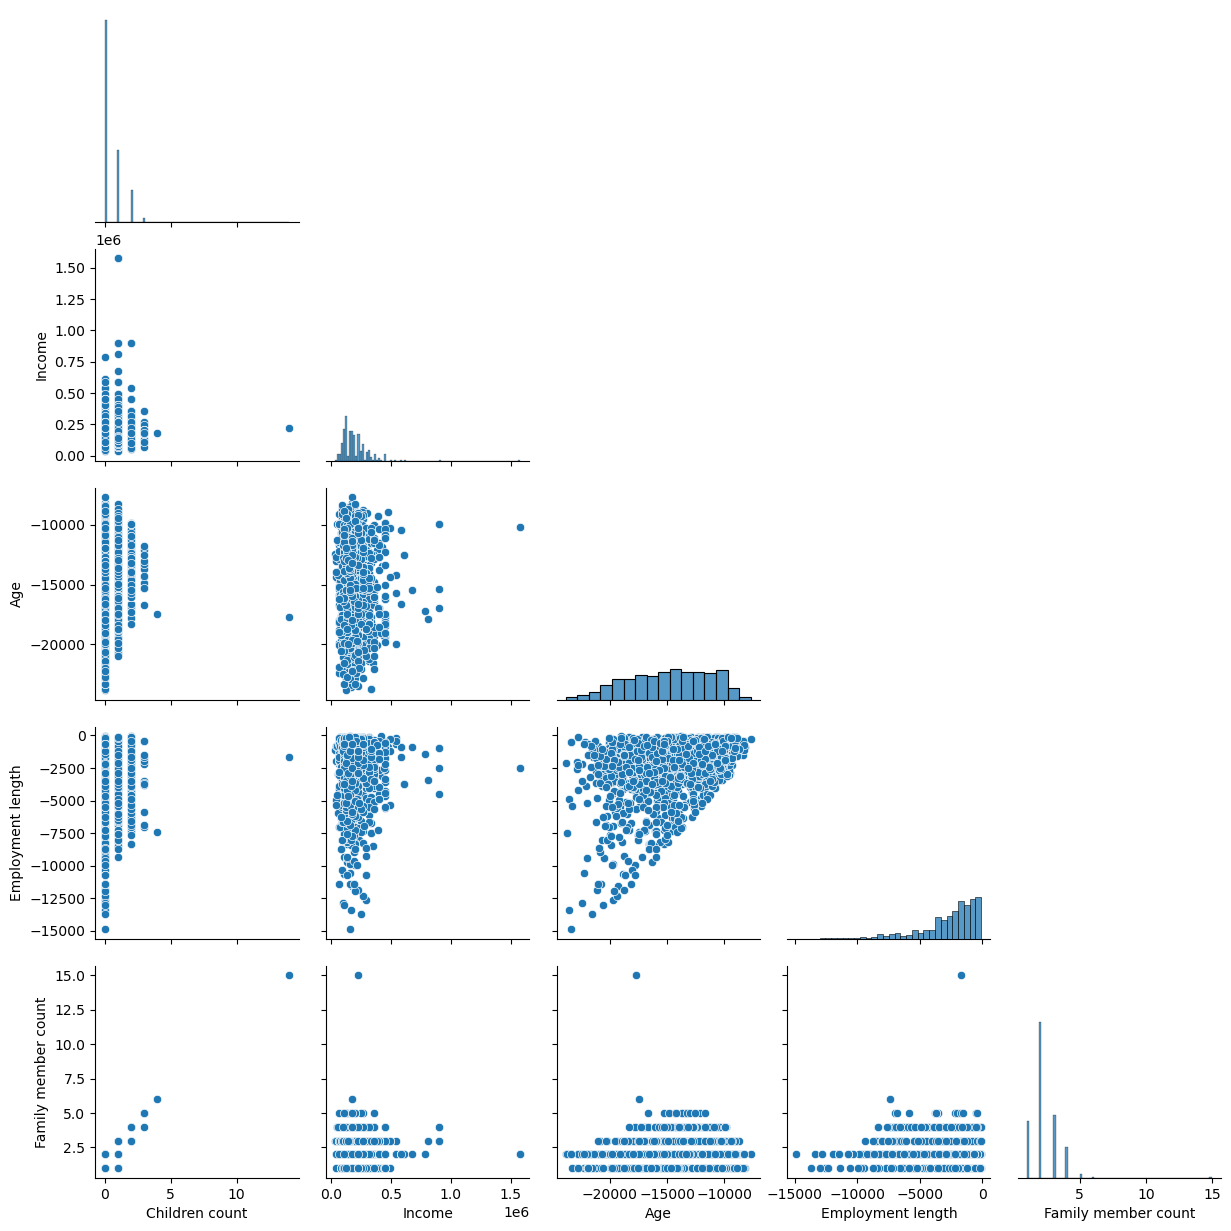

In [81]:
sns.pairplot(credit_card_data[credit_card_data['Employment length'] < 0].drop(['Client ID','Has a mobile phone', 'Work_Phone', 'Has a phone', 'Has an email'],axis=1),corner=True)
plt.show()

##### Interpretation:
- We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.
- Another interesting trend is the Employment length and age. This also makes sense, the longer the employee has been working, the older they are.

##### 2.4.1.1.1 Family member count vs children count (numerical vs numerical feature comparison)

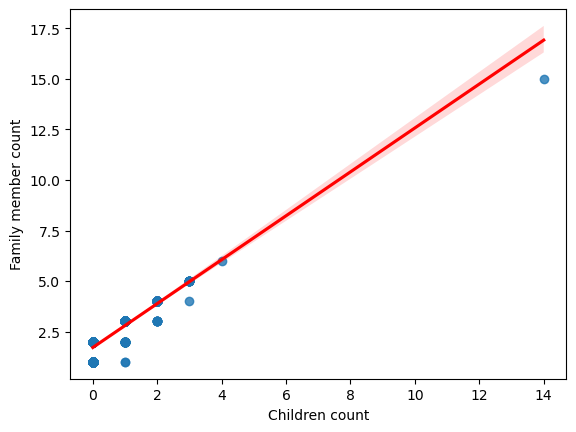

In [82]:
sns.regplot(x='Children count',y='Family member count',data=credit_card_data,line_kws={'color': 'red'})
plt.show()

##### Interpretation:
- The more children a person has, the larger the family member count.

##### 2.4.1.1.2 Account age vs age (numerical vs numerical feature comparison)

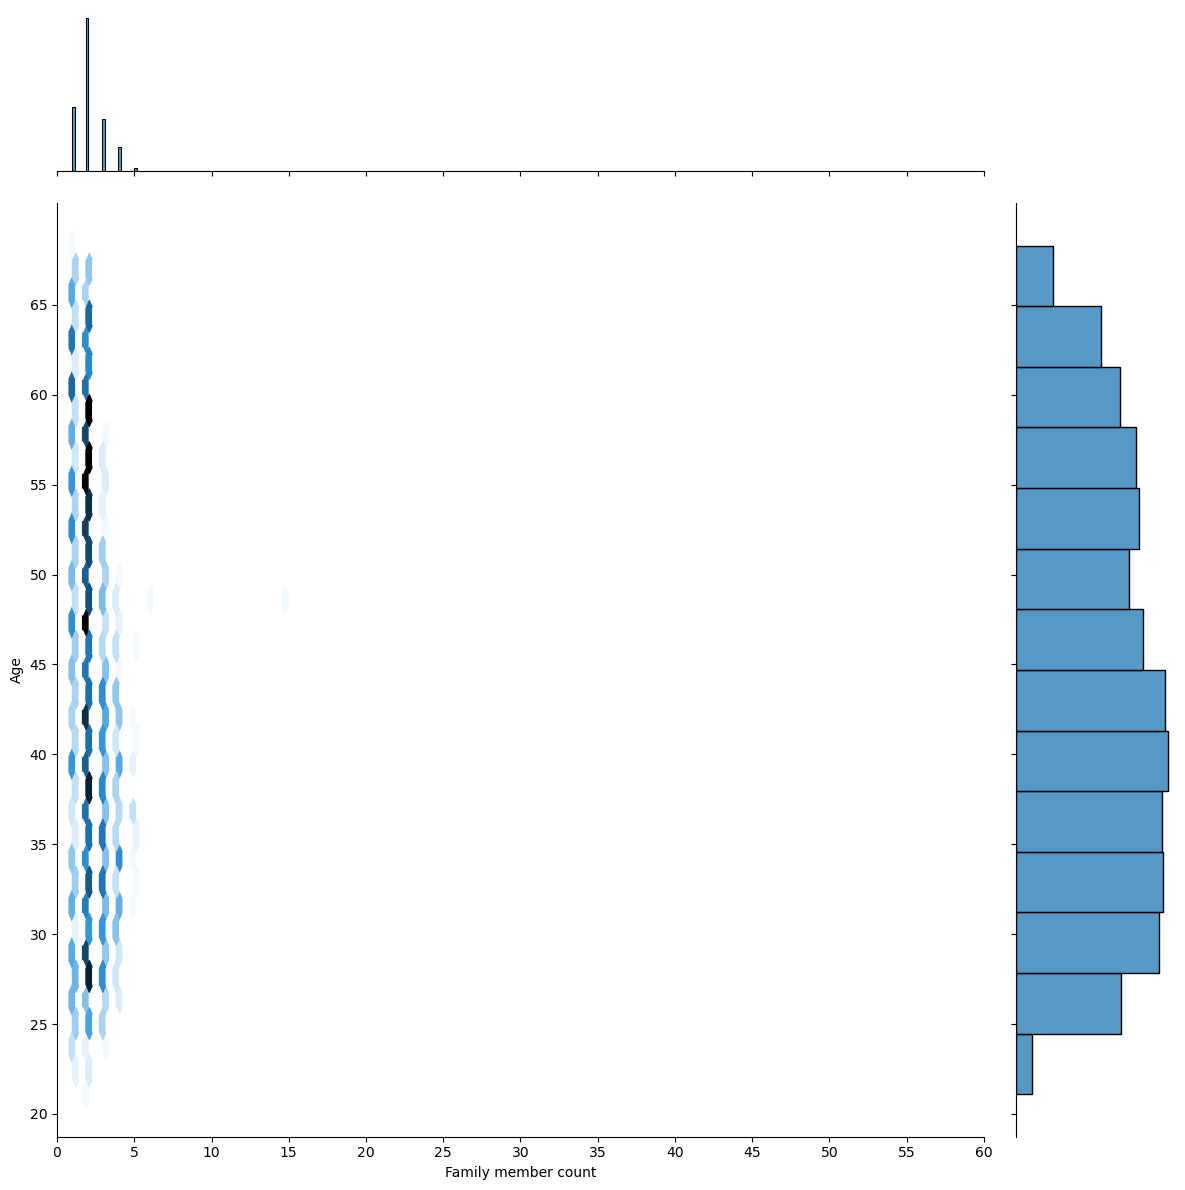

In [83]:
y_age = np.abs(credit_card_data['Age']) / 365.25
sns.jointplot(x=np.abs(credit_card_data['Family member count']), y=y_age, kind="hex", height=12)
plt.yticks(np.arange(20, y_age.max(), 5))
plt.xticks(np.arange(0, 65, 5))
plt.ylabel('Age')
plt.show()


###### Interpretation:
- Most of the applicants are between 20 and 60 years old and have an account that is less than 25 months old.

##### 2.4.1.1.3 Employment length vs age (numerical vs numerical feature comparison)

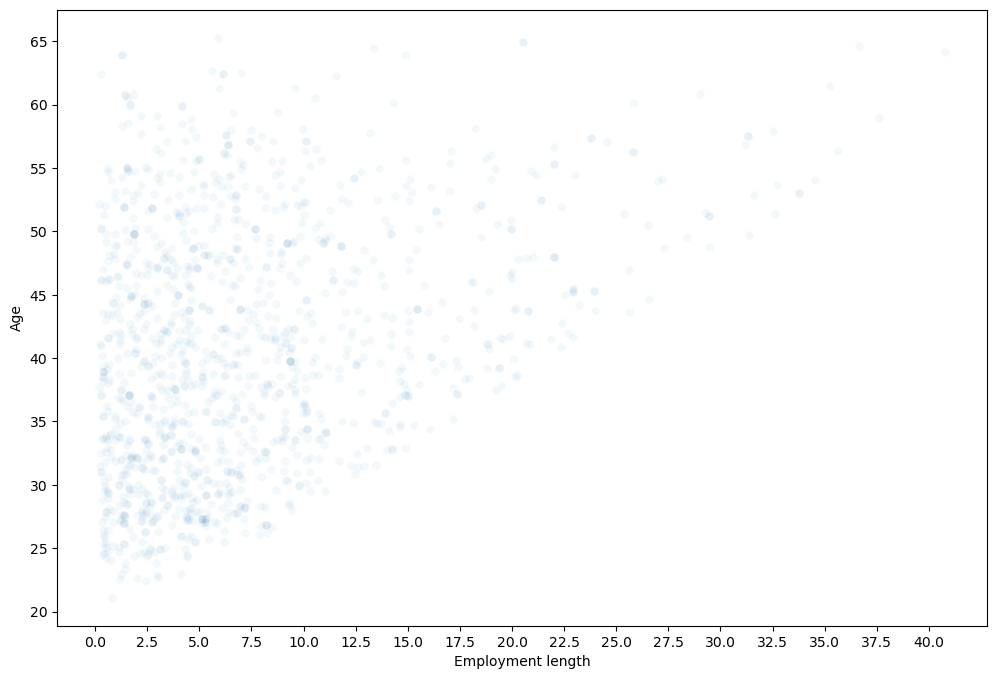

In [84]:
x_employ_length = np.abs(credit_card_data[credit_card_data['Employment length'] < 0]['Employment length']) / 365.25
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=x_employ_length, y=y_age, alpha=0.05)

# Change the frequency of the x-axis and y-axis labels
plt.xticks(np.arange(0, x_employ_length.max(), 2.5))
plt.yticks(np.arange(20, y_age.max(), 5))

plt.show()


##### Interpretation:
- This scatterplot shows that the age of the applicants is correlated with the length of the employment.
The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the length of the employment. You can't have an employment length > than the age.

#### 2.4.1.2 Correlation analysis

In [85]:
# change the datatype of target feature to int
Level = df['label'].astype('int32')

                     Client ID  Children count  Income   Age  \
Client ID                 1.00            0.03    0.03  0.02   
Children count            0.03            1.00    0.08  0.28   
Income                    0.03            0.08    1.00  0.11   
Age                       0.02            0.28    0.11  1.00   
Employment length        -0.06           -0.22   -0.16 -0.62   
Has a mobile phone         NaN             NaN     NaN   NaN   
Work_Phone                0.09            0.04   -0.07  0.17   
Has a phone               0.01           -0.00   -0.01 -0.03   
Has an email             -0.04            0.03    0.12  0.17   
Family member count       0.02            0.89    0.05  0.27   

                     Employment length  Has a mobile phone  Work_Phone  \
Client ID                        -0.06                 NaN        0.09   
Children count                   -0.22                 NaN        0.04   
Income                           -0.16                 NaN       -0.07   

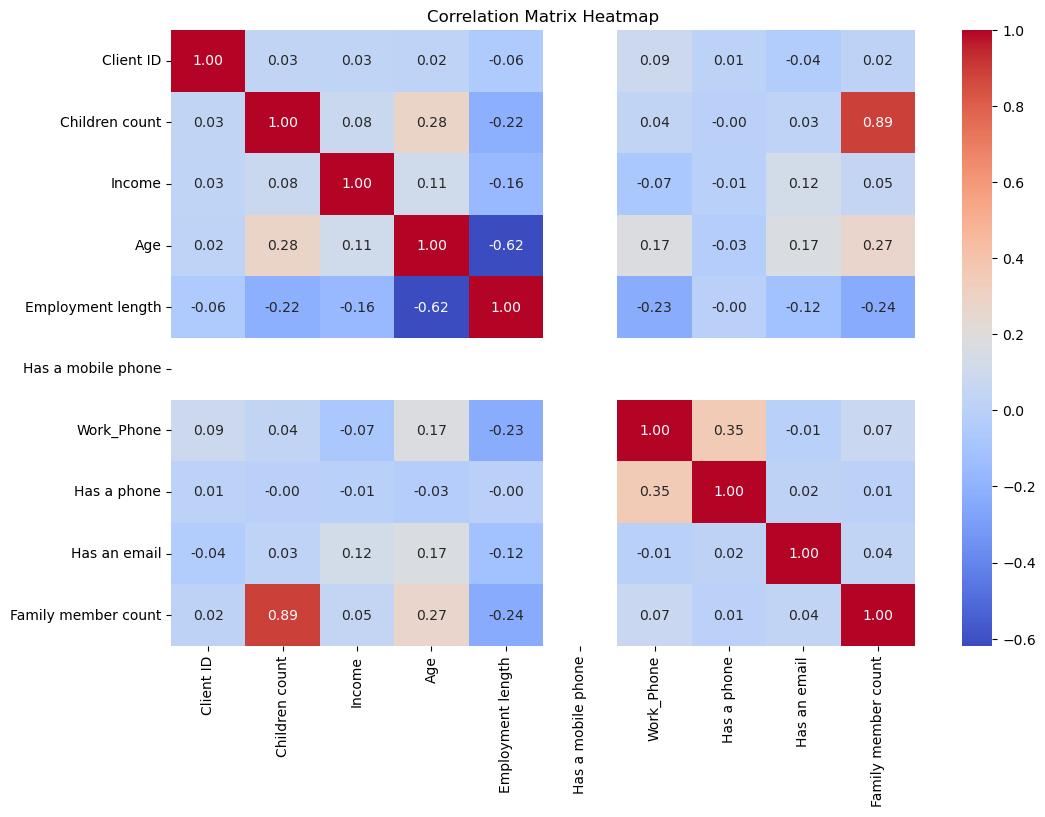

In [86]:
# Assuming you have a DataFrame 'df' with both numeric and non-numeric columns
# Select only the numeric columns for correlation analysis
numeric_df = credit_card_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



##### Interpretation:
- There is no feature that is correlated with the target feature

### 2.4.2 Numerical vs categorical features (ANOVA)

#### 2.4.2.1 Age vs the rest of categorical features

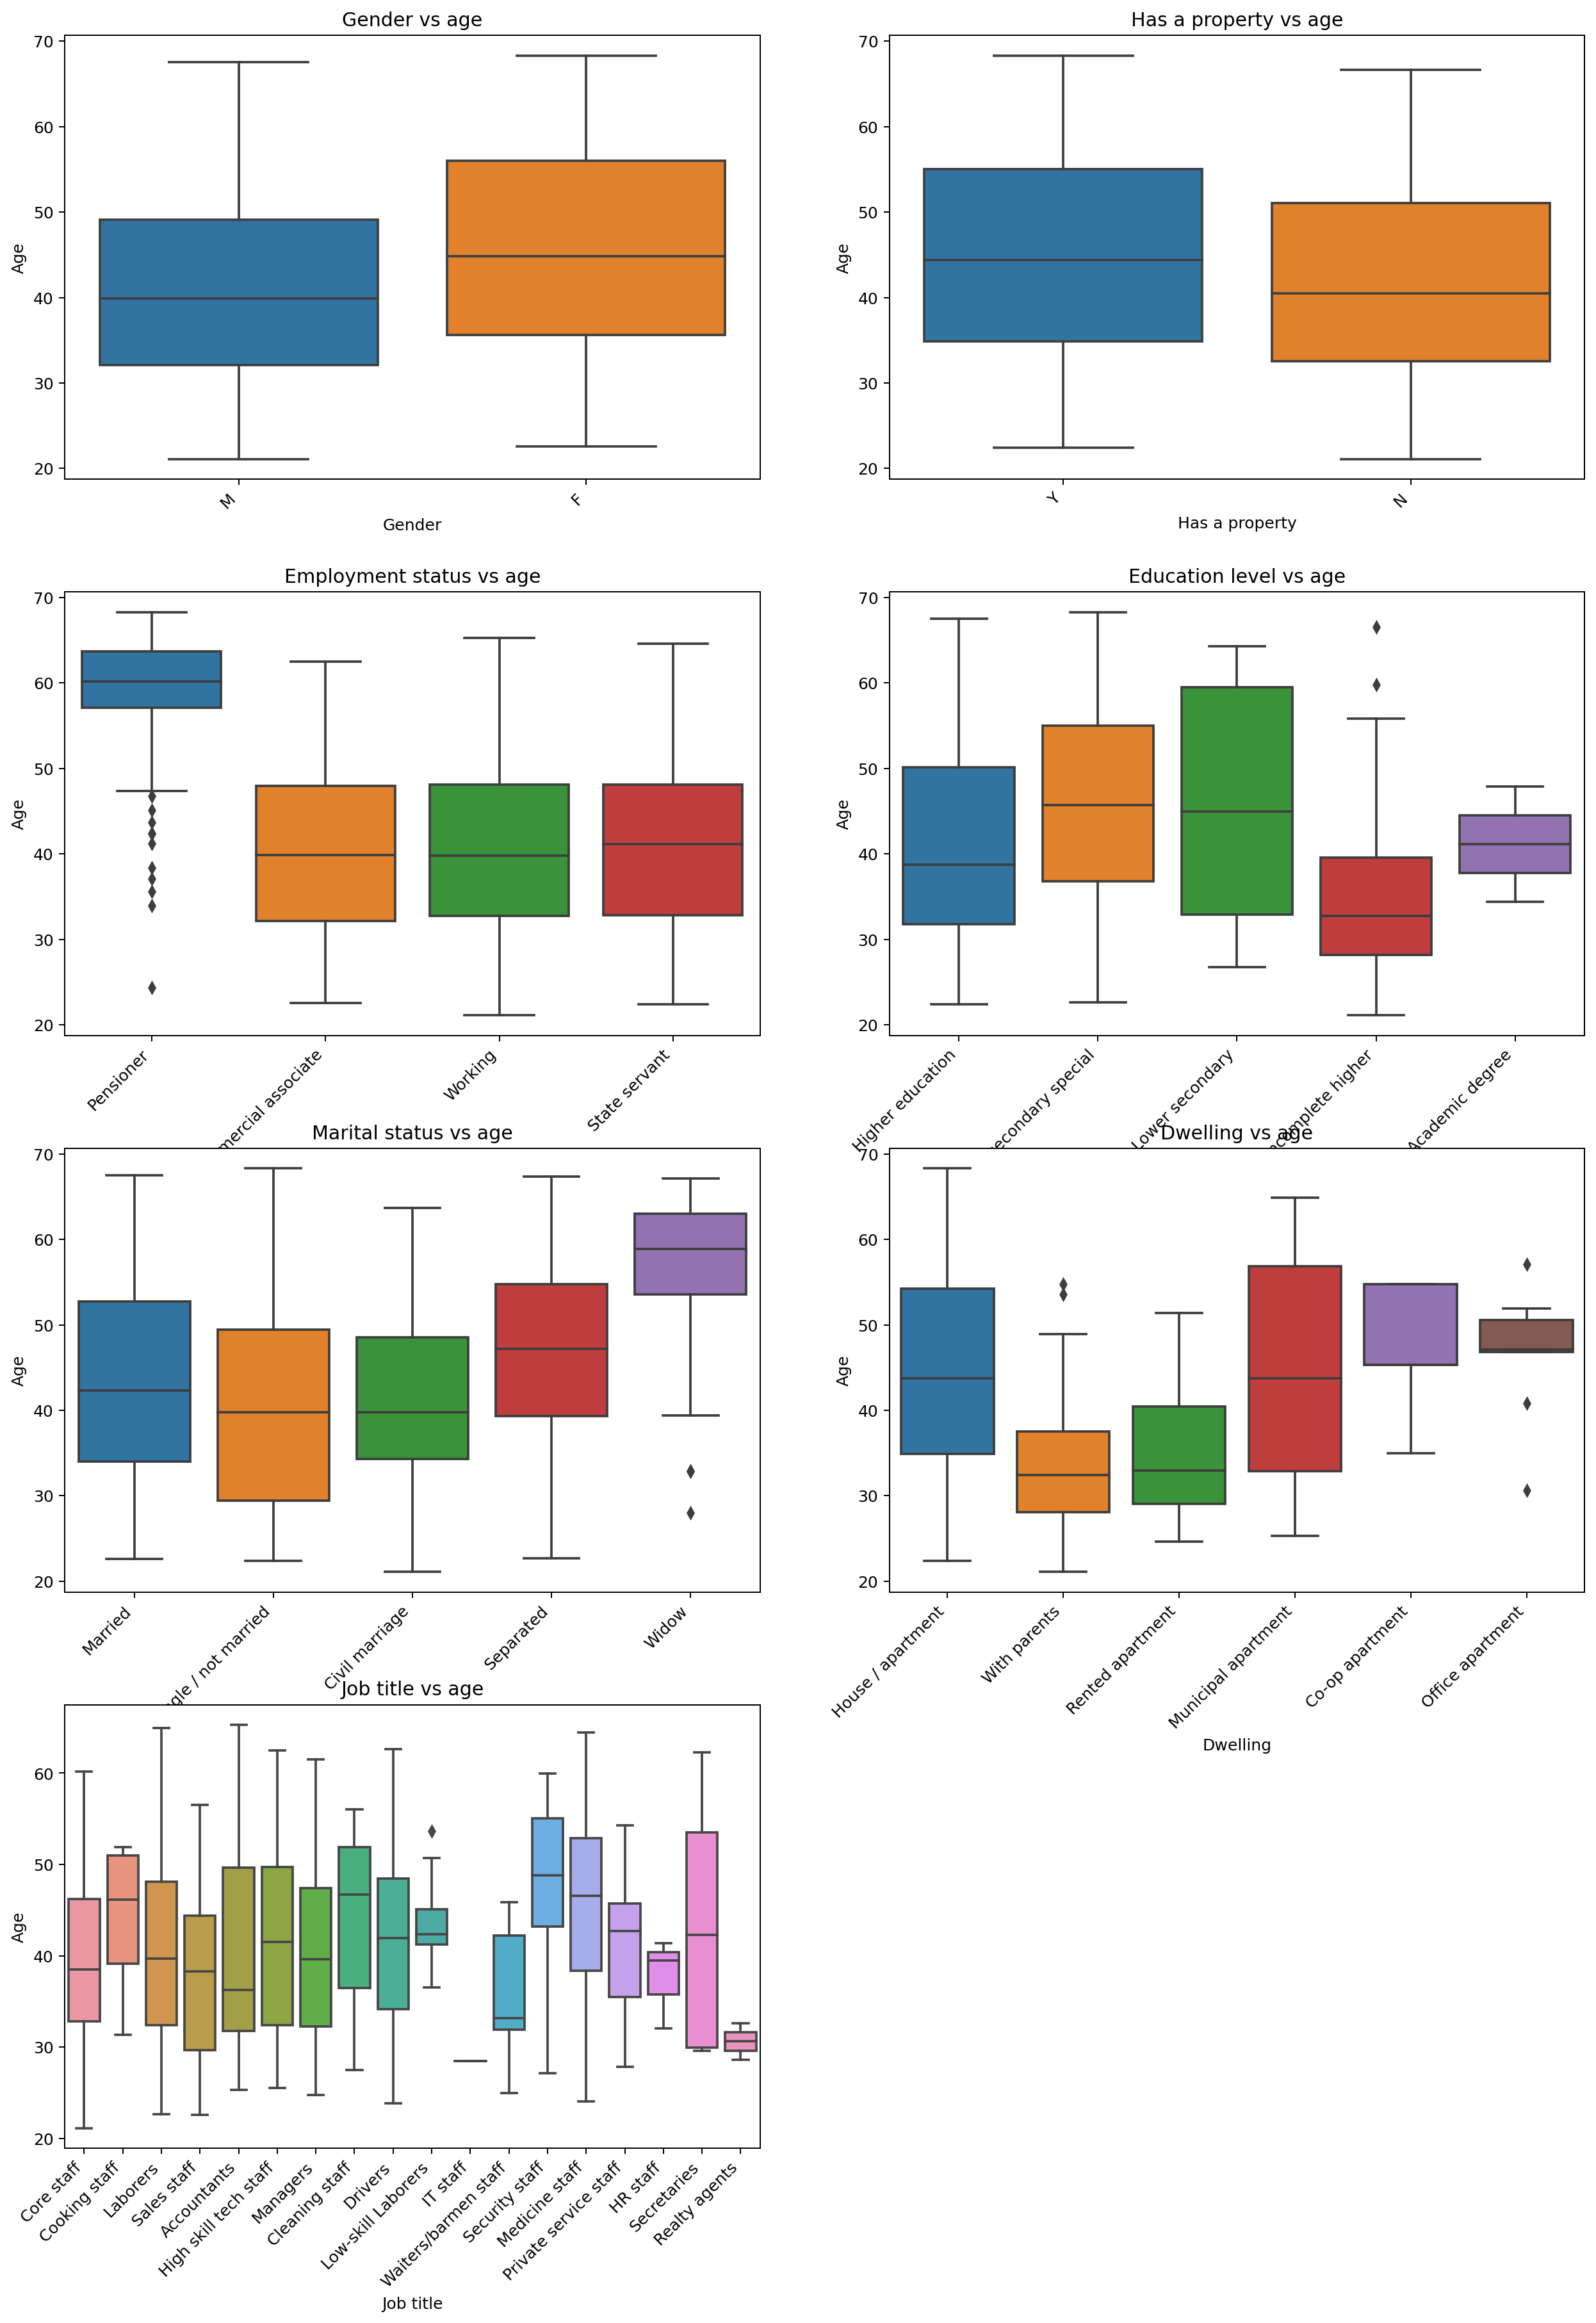

In [87]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']

# Ensure you don't go out of bounds by using enumerate and limiting the iteration
for cat_ft_count, ax in enumerate(axes.flat):
    if cat_ft_count < len(cat_features):
        sns.boxplot(ax=ax, x=credit_card_data[cat_features[cat_ft_count]], y=np.abs(credit_card_data['Age']) / 365.25)
        ax.set_title(cat_features[cat_ft_count] + " vs age")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylabel('Age')
    else:
        # Hide empty subplots
        ax.axis('off')

plt.show()


###### Interpretation:
- Female applicants are older than their male counterpart.
- Those who own a property tend to be older than those who don't.
- Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those are outliers).
- It is also interesting to see that those who hold an academic degree are younger in general than the other groups.
- Obviously, the widows tend to be much older. We also see some outliers in their 30's as well.
- With no surprise, those who live with parent tend to be younger. We also see some outlier as well.
- Lastly, who work as cleaning staff tend to be older while those who work in IT tend to be younger.

#### 2.4.2.2 Income vs the rest of categorical features

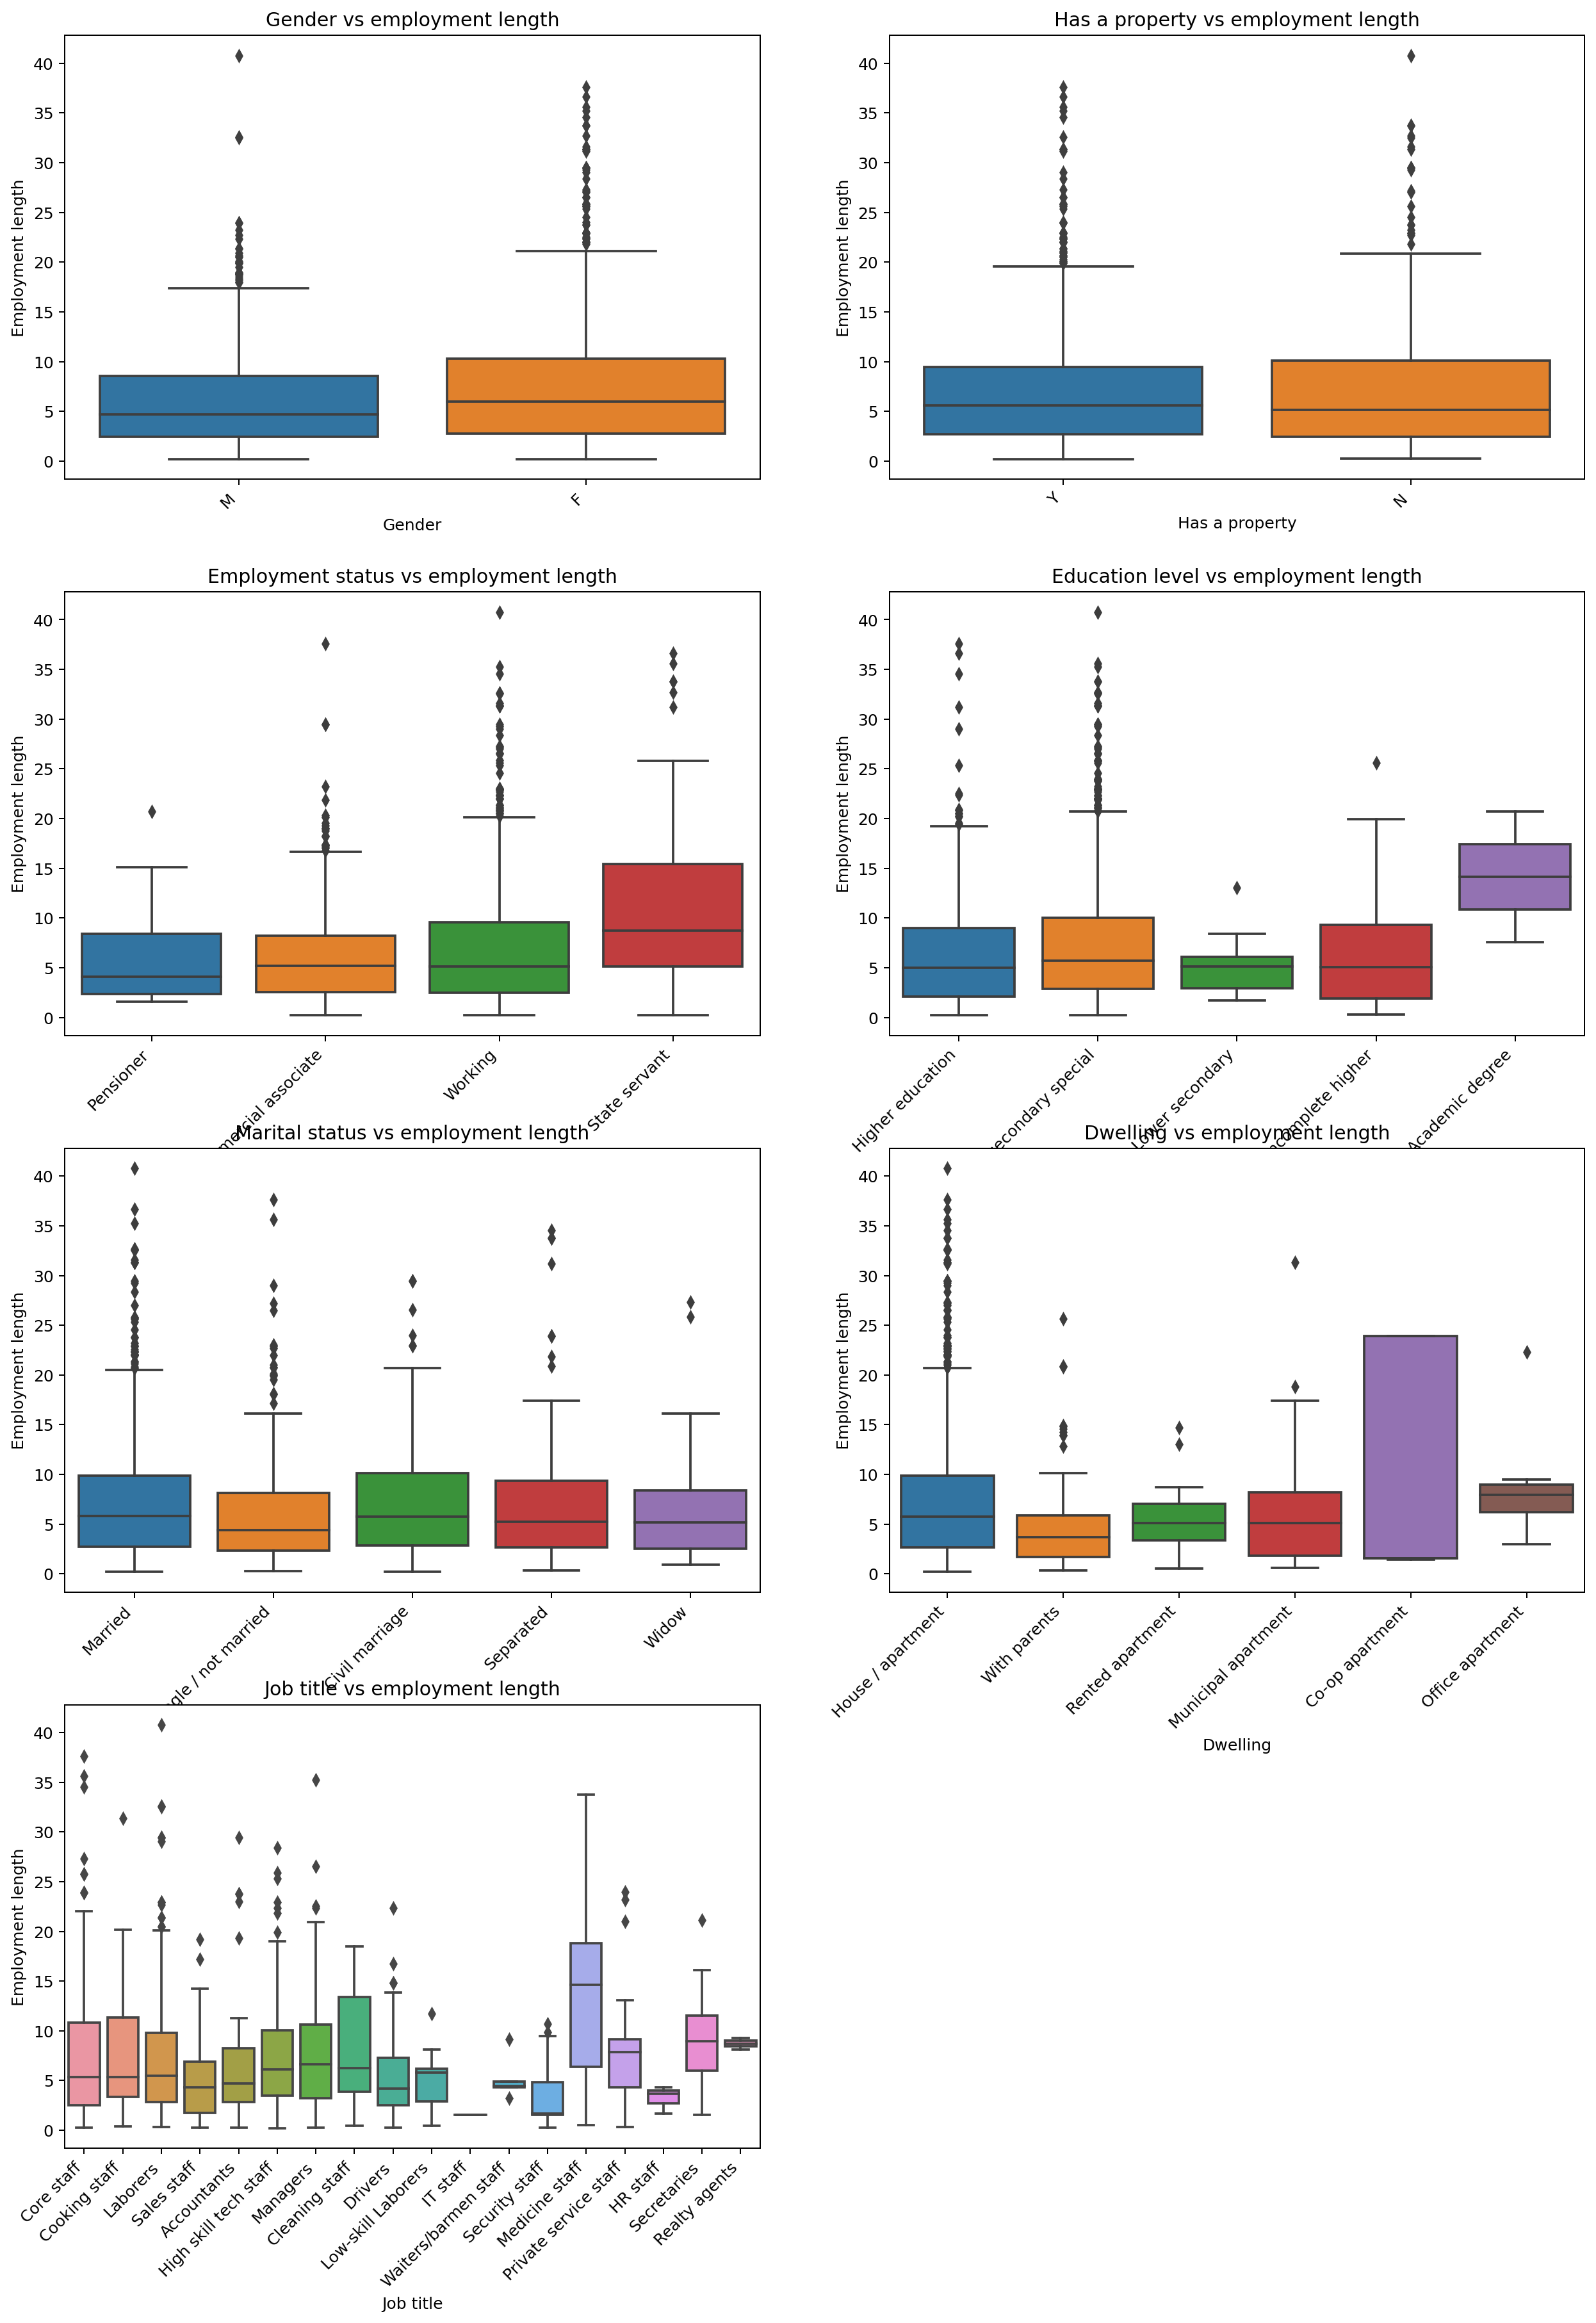

In [88]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=180)
fig.tight_layout(pad=5.0)

# Ensure you don't go out of bounds by using enumerate and limiting the iteration
for cat_ft_count, ax in enumerate(axes.flat):
    if cat_ft_count < len(cat_features):
        sns.boxplot(ax=ax, x=credit_card_data[cat_features[cat_ft_count]], y=np.abs(credit_card_data[credit_card_data['Employment length'] < 0]['Employment length']) / 365.25)
        ax.set_title(cat_features[cat_ft_count] + " vs employment length")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylabel('Employment length')
    else:
        # Hide empty subplots
        ax.axis('off')

plt.show()

###### Interpretation:
- State employed applicant tend to have been employed longer than the rest.
- Those who work in the medical field, have been employed longer than the rest.

### 2.4.3 Categorical vs categorical features (Chi-square test)

Null hypothesis: the feature's categories have no effect on the target variable.
Alternate hypothesis: one(or more) of the feature categories has a significant effect on the target variable.

In [89]:
import pandas as pd
from scipy import stats

def chi_func(feature):
    # Selection of rows with high risk
    Level_ft = df[df['label'] == 1][feature]
    Level_ft_ct = pd.crosstab(index=Level_ft, columns=['Count']).rename_axis(None, axis=1)
    # Drop the index feature name
    Level_ft_ct.index.name = None
    # Observe values
    obs = Level_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')
    # Expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum() / len(obs)] * len(obs.index), columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # Chi-square test
    chi_squared_stat = (((obs - exp) ** 2) / exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    # Critical value
    crit = stats.chi2.ppf(q=0.95, df=len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # P-value
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')

# List of categorical features
cat_ft = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for ft in cat_ft:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)




**** GENDER ****

Observed values:

   Count
F     95
M     75


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F  85.00
M  85.00


Chi-square:

2.3529411764705883


Critical value:

3.841458820694124


P-value:

[0.12504688]


Fail to reject the null hypothesis


**** Car_Owner ****

Observed values:

   Count
N    108
Y     67


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  87.50
Y  87.50


Chi-square:

9.605714285714285


Critical value:

3.841458820694124


P-value:

[0.00193973]


Reject the null hypothesis


**** Propert_Owner ****

Observed values:

   Count
N     65
Y    110


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  87.50
Y  87.50


Chi-square:

11.571428571428571


Critical value:

3.841458820694124


P-value:

[0.00066973]


Reject the null hypothesis


**** Type_Income ****

Observed values:

                      Count
Commercial associate     50
Pensioner                42
State servant             6
Working        

# 3. Prepare the data

## 3.1 Transform to be done on each feature

Client ID:
* Drop the feature

Gender:
* One hot encoding

Age:
* Min-max scaling
* Fix skewness

Marital status:
* One hot encoding

Family member count
* Fix outliers

Children count
* Fix outliers
* Drop feature

Dwelling type
* One hot encoding

Income
* Remove outliers
* Fix skewness
* Min-max scaling

Job title
* One hot encoding
* Impute missing values

Employment status:
* One hot encoding

Education level:
* Ordinal encoding

Employment length:
* Remove outliers
* Min-max scaling

Has a car:
* Change it numerical
* One-hot encoding

Has a property:
* Change it numerical
* One-hot encoding

Has a mobile phone:
* Drop feature

Has a work phone:
* One-hot encoding

Has a phone:
* One-hot encoding

Has an email:
* One-hot encoding

Account age:
* Drop feature

level(Target):
* balance the data with SMOTE

## 3.2 Data Cleaning

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

### 3.2.1 Outliers handling

In [197]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_outliers=['Family_Members', 'Annual_income', 'Employed_days']):
        self.feat_with_outliers = feat_with_outliers

    def fit(self, df):
        return self

    def transform(self, df):
        if set(self.feat_with_outliers).issubset(df.columns):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(0.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(0.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) | (df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe1")
            return df


## 3.3 Feature selection

### 3.3.1 Drop features

In [310]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['Ind_ID','Mobile_phone','CHILDREN','Type_Occupation','GENDER']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe2")
            return df

###### Why are we droping these features?
- Client ID:Client ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.
- Has a mobile phone: Since everyone has a mobile phone, this feature does not inform us about anything.
- Children count: is highly correlated with Family member count, and to avoid multicollinearity, we drop it.
- Job title: Has some missing values and the count of each category is not very different to justify the use of mode. So we drop it.

## 3.4 Feature engineering

### 3.4.1 Time conversion

In [311]:
class TimeConversionHandler(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_days = ['Employed_days', 'Birthday_count']):
        self.feat_with_days = feat_with_days
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if (set(self.feat_with_days).issubset(X.columns)):
            # convert days to absolute value
            X[['Employed_days', 'Birthday_count']] = np.abs(X[['Employed_days', 'Birthday_count']])
            return X
        else:
            print("One or more features are not in the dataframe3")
            return X

### 3.4.2 Retiree handling (in the employment length feature)

In [312]:
class RetireeHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, df):
        return self
    def transform(self, df):
        if 'Employed_days' in df.columns:
            # select rows with employment length is 365243 which corresponds to retirees
            df_ret_idx = df['Employed_days'][df['Employed_days'] == 365243].index
            # change 365243 to 0
            df.loc[df_ret_idx,'Employed_days'] = 0
            return df
        else:
            print("Employment length is not in the dataframe4")
            return df

### 3.4.3 Skewness handling

In [313]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_skewness=['Annual_income','Birthday_count']):
        self.feat_with_skewness = feat_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.feat_with_skewness] = np.cbrt(df[self.feat_with_skewness])
            return df
        else:
            print("One or more features are not in the dataframe5")
            return df

### 3.4.5 One hot encoding (with feature's name)

In [314]:
class OneHotWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,one_hot_enc_ft = ['Propert_Owner','Marital_status','Type_Income','Housing_type']):
        self.one_hot_enc_ft = one_hot_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.one_hot_enc_ft).issubset(df.columns)):
            # function to one hot encode the features in one_hot_enc_ft
            def one_hot_enc(df,one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # get the result of the one hot encoding columns names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # change the array of the one hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(),columns=feat_names_one_hot_enc,index=df.index)
                return df
            # function to concatenat the one hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df,one_hot_enc_df,one_hot_enc_ft):
                # get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # concatenate the rest of the features with the one hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]],axis=1)
                return df_concat
            # one hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df,self.one_hot_enc_ft)
            # returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df,one_hot_enc_df,self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe00")
            return df

### 3.4.6 Ordinal encoding (with feature's names)

In [315]:
from sklearn.preprocessing import OrdinalEncoder

In [316]:
class OrdinalFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_enc_ft = ['EDUCATION']):
        self.ordinal_enc_ft = ordinal_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if 'EDUCATION' in df.columns:
            ordinal_enc = OrdinalEncoder()
            df[self.ordinal_enc_ft] = ordinal_enc.fit_transform(df[self.ordinal_enc_ft])
            return df
        else:
            print("EDUCATION is not in the dataframe")
            return df

### 3.4.7 Min-Max scaling (with feature's names)

In [317]:
from sklearn.preprocessing import MinMaxScaler

In [318]:
class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['Birthday_count', 'Annual_income', 'Employed_days']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe9")
            return df

### 3.4.8 Change the data types of the target feature

In [319]:
class ChangeToNumTarget(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'label' in df.columns:
            df['label'] = pd.to_numeric(df['label'])
            return df
        else:
            print("label not in the dataframe")
            return df

## 3.5 Data Preprocessing

In [320]:
def full_pipeline(df):
    # Create the pipeline that will call all the class from OutlierRemoval to OversampleSMOTE in one go
    pipeline = Pipeline([
        ('outlier_remover', OutlierRemover()),
        ('feature_dropper', DropFeatures()),
        ('time_conversion_handler', TimeConversionHandler()),
        ('retiree_handler', RetireeHandler()),
        ('skewness_handler', SkewnessHandler()),
        ('one_hot_with_feat_names', OneHotWithFeatNames()),
        ('ordinal_feat_names', OrdinalFeatNames()),
        ('min_max_with_feat_names', MinMaxWithFeatNames()),
        ('change_to_num_target', ChangeToNumTarget())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [326]:
pd.options.mode.chained_assignment = None  # Hide the copy warning
cc_train_prep = full_pipeline(df)

In [327]:
cc_train_prep.dropna(inplace=True)

In [334]:
cc_train_prep = cc_train_prep.drop('Car_Owner', axis=1)


In [335]:
cc_train_prep.shape

(1217, 27)

In [369]:
pd.set_option('display.max_columns', None)
cc_train_prep.head()

Propert_Owner_N  Propert_Owner_Y  Marital_status_Civil marriage  \
1             1.00             0.00                           0.00   
4             1.00             0.00                           0.00   
5             1.00             0.00                           0.00   
6             1.00             0.00                           0.00   
8             0.00             1.00                           0.00   

   Marital_status_Married  Marital_status_Separated  \
1                    1.00                      0.00   
4                    1.00                      0.00   
5                    1.00                      0.00   
6                    1.00                      0.00   
8                    1.00                      0.00   

   Marital_status_Single / not married  Marital_status_Widow  \
1                                 0.00                  0.00   
4                                 0.00                  0.00   
5                                 0.00                  0.00   
6                                 0.00                  0.00   
8                                 0.00                  0.00   

   Type_Income_Commercial associate  Type_Income_Pensioner  \
1                              1.00                   0.00   
4                              1.00                   0.00   
5                              0.00                   1.00   
6                              1.00                   0.00   
8                              1.00                   0.00   

   Type_Income_State servant  Type_Income_Working  \
1                       0.00                 0.00   
4                       0.00                 0.00   
5                       0.00                 0.00   
6                       0.00                 0.00   
8                       0.00                 0.00   

   Housing_type_Co-op apartment  Housing_type_House / apartment  \
1                          0.00                            1.00   
4                          0.00                            1.00   
5                          0.00                            1.00   
6                          0.00                            1.00   
8                          0.00                            1.00   

   Housing_type_Municipal apartment  Housing_type_Office apartment  \
1                              0.00                           0.00   
4                              0.00                           0.00   
5                              0.00                           0.00   
6                              0.00                           0.00   
8                              0.00                           0.00   

   Housing_type_Rented apartment  Housing_type_With parents  Annual_income  \
1                           0.00                       0.00           0.76   
4                           0.00                       0.00           0.76   
5                           0.00                       0.00           0.76   
6                           0.00                       0.00           0.76   
8                           0.00                       0.00           0.95   

   EDUCATION  Birthday_count  Employed_days  Work_Phone  Phone  EMAIL_ID  \
1       1.00            0.45           0.05           1      1         0   
4       1.00            0.45           0.05           1      1         0   
5       1.00            0.45           0.05           1      1         0   
6       1.00            0.45           0.05           1      1         0   
8       4.00            0.72           0.05           0      1         1   

   Family_Members  label  Birthday_count_years  
1               2      1                 37.12  
4               2      1                 37.12  
5               2      1                 37.12  
6               2      1                 37.12  
8               3      1                 49.75

In [370]:
# split the train data into X and y (target)
X_cc_train_prep = cc_train_prep.drop(columns=['label'])
y_cc_train_prep = cc_train_prep['label'].astype('int64')

# 4. Short-list promising models

## 4.1 Models training

#### 4.1.1LogisticRegression

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_cc_train_prep, y_cc_train_prep, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       220
           1       0.50      0.04      0.08        24

    accuracy                           0.90       244
   macro avg       0.70      0.52      0.51       244
weighted avg       0.87      0.90      0.86       244



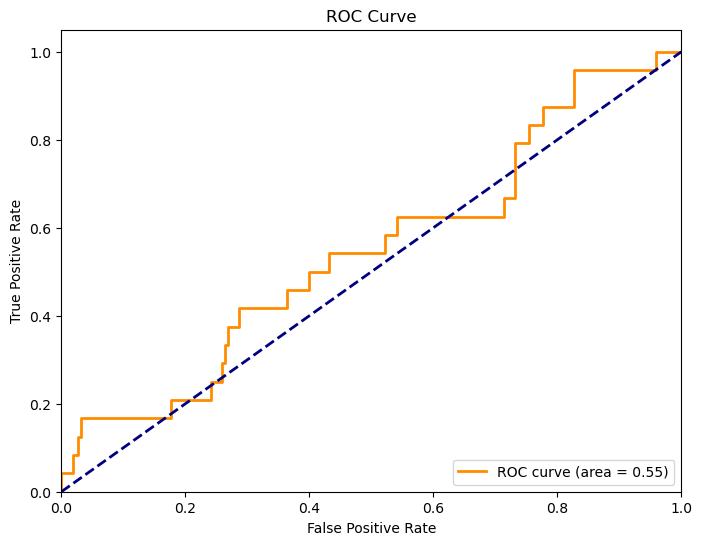

In [392]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Create and fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### 4.1.2 Decision Tree

In [382]:
#Import the Necessary Libraries:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Split Your Data:
X_train, X_test, y_train, y_test = train_test_split(X_cc_train_prep, y_cc_train_prep, test_size=0.2, random_state=42)

# Create the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

#Make Predictions:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       220
           1       0.36      0.42      0.38        24

    accuracy                           0.87       244
   macro avg       0.65      0.67      0.66       244
weighted avg       0.88      0.87      0.87       244



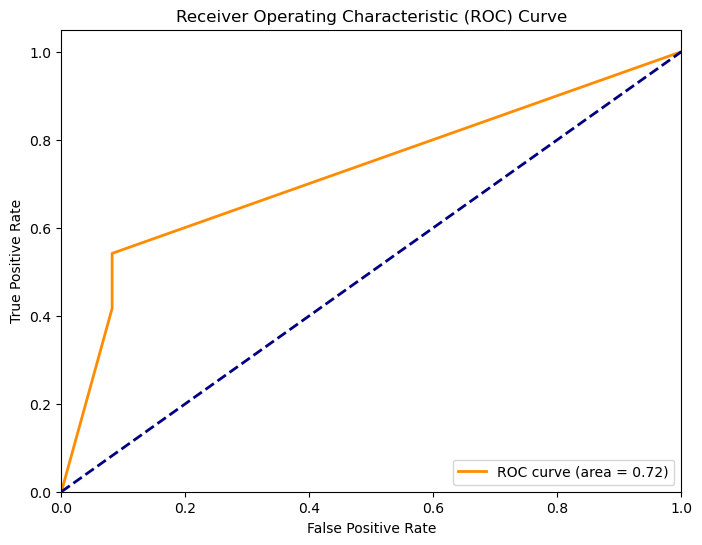

In [384]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### 4.1.3 Gradient Boost

In [385]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cc_train_prep, y_cc_train_prep, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       220
           1       0.70      0.29      0.41        24

    accuracy                           0.92       244
   macro avg       0.81      0.64      0.68       244
weighted avg       0.90      0.92      0.90       244



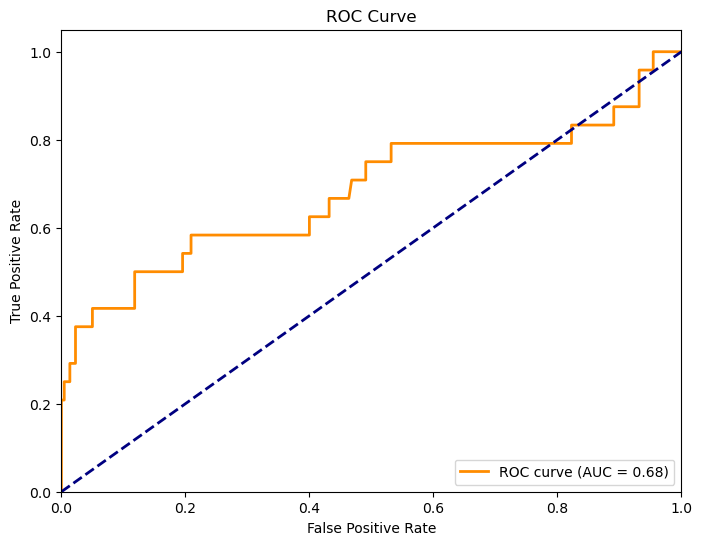

In [386]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cc_train_prep, y_cc_train_prep, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = gradient_boosting.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### 4.1.4 XGBoost

Accuracy: 0.91
ROC AUC: 0.67


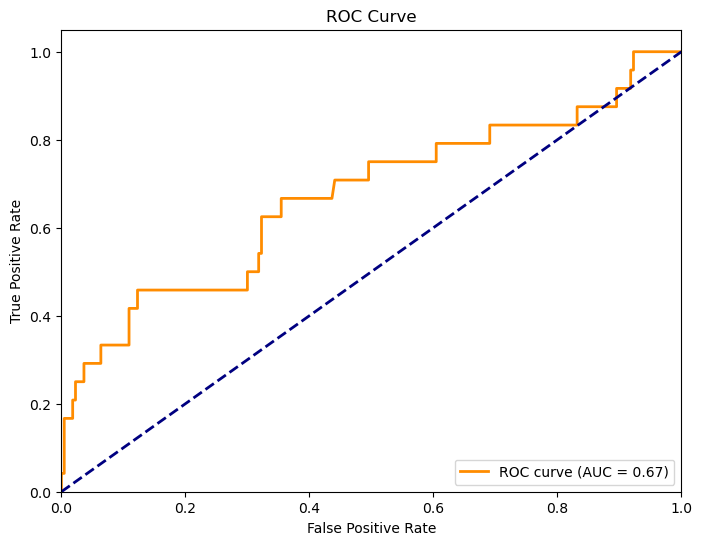

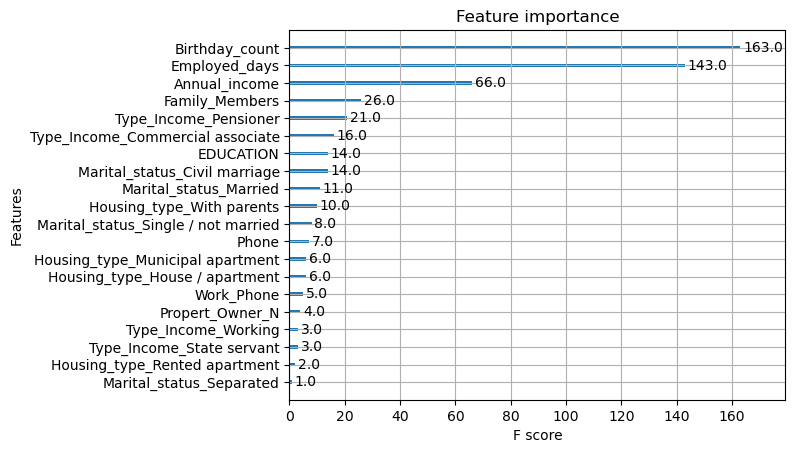

In [387]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cc_train_prep, y_cc_train_prep, test_size=0.2, random_state=42)

# Create and fit the XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance plot
plot_importance(model)
plt.show()


#### 4.1.5 Bagging

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       220
           1       0.64      0.38      0.47        24

    accuracy                           0.92       244
   macro avg       0.79      0.68      0.71       244
weighted avg       0.91      0.92      0.91       244



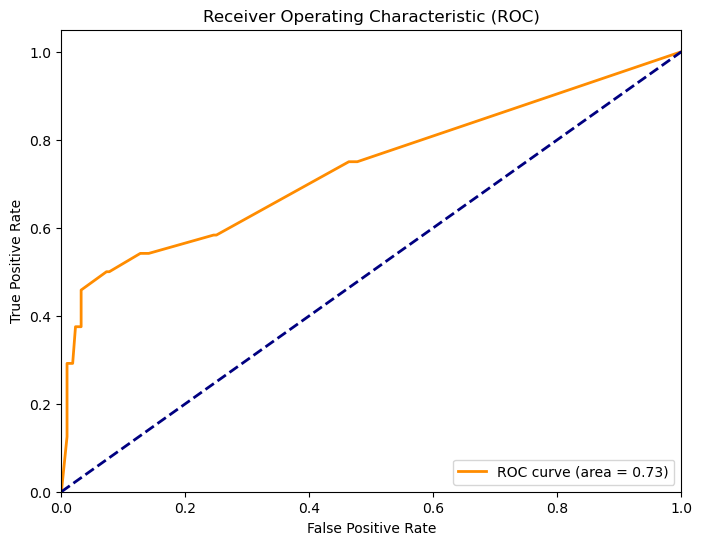

In [390]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cc_train_prep, y_cc_train_prep, test_size=0.2, random_state=42)

# Create the BaggingClassifier model
bagging_model = BaggingClassifier(random_state=42)

# Fit the model to the training data
bagging_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC
y_probs = bagging_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## 4.2 Top model

##### Using the ROC curve and recall, we can that conclude that our top model is:
- Bagging